In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import \
    homogeneity_completeness_v_measure, \
    mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from datetime import datetime
from time import time

In [2]:
datos = pd.read_csv('GooglePlayStore_Preprocesed.csv', sep = ',', parse_dates = ['Released', 'Last Updated'])
datos

,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Price USD
0,com.httrack.android,Communication,3.6,2848,100000,351560,True,2700,2.3,2013-08-12,2017-05-20,Everyone,False,False,0.0
1,com.skizze.wwii,Game,4.3,17297,1000000,2161778,True,86000,5.1,2018-07-19,2020-11-26,Everyone 10+,True,True,0.0
2,com.themausoft.wpsapp,Tools,4.2,488639,50000000,79304739,True,5800,4.1,2016-03-07,2020-10-21,Everyone,True,False,0.0
3,com.mobisystems.office,Business,4.2,1224420,100000000,163660067,True,59000,4.4,2011-12-22,2020-11-23,Everyone,True,True,0.0
4,com.arthelion.loudplayer,Music & Audio,4.2,665,50000,73463,True,29000,5.0,2016-09-24,2020-11-22,Everyone,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676329,com.varbin.dsr,Business,3.7,6,1000,2998,True,6800,4.0,2017-01-12,2017-04-05,Everyone,True,False,0.0
676330,com.RandoS.WallJump,Game,5.0,7,50,62,True,15000,4.4,2020-05-27,2020-06-08,Everyone,True,False,0.0
676331,com.nivida.user.Boss,Shopping,4.2,10,1000,3323,True,8300,4.1,2017-02-08,2018-10-15,Everyone,False,False,0.0
676332,com.varbin.shreesensamaj,Social,4.6,36,1000,4258,True,12000,4.1,2017-12-11,2017-12-13,Everyone,False,False,0.0


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676334 entries, 0 to 676333
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   App Id            676334 non-null  object        
 1   Category          676334 non-null  object        
 2   Rating            676334 non-null  float64       
 3   Rating Count      676334 non-null  int64         
 4   Minimum Installs  676334 non-null  int64         
 5   Maximum Installs  676334 non-null  int64         
 6   Free              676334 non-null  bool          
 7   Size              676334 non-null  int64         
 8   Minimum Android   676334 non-null  float64       
 9   Released          676334 non-null  datetime64[ns]
 10  Last Updated      676334 non-null  datetime64[ns]
 11  Content Rating    676334 non-null  object        
 12  Ad Supported      676334 non-null  bool          
 13  In App Purchases  676334 non-null  bool          
 14  Pric

# 1. ANÁLISIS EXPLORATORIO COMPLETO

### Matrices de Covarianza y Correlación

In [4]:
datos.cov()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Size,Minimum Android,Ad Supported,In App Purchases,Price USD
Rating,0.419204,1.748154e+03,5.078449e+04,9.330158e+04,-0.002918,-9.571375e+01,-0.003784,0.016113,-0.000871,0.007356
Rating Count,1748.154476,1.047588e+11,3.806070e+12,6.437019e+12,239.198095,1.682360e+08,875.748351,175.628094,3933.828060,-1035.764549
Minimum Installs,50784.492029,3.806070e+12,5.765767e+14,8.123564e+14,16482.250916,3.167175e+09,78579.138778,-37016.803112,126685.531166,-71787.159636
Maximum Installs,93301.583142,6.437019e+12,8.123564e+14,1.298178e+15,28793.837129,5.626910e+09,126448.589193,-59746.943077,230166.440953,-125370.071131
Free,-0.002918,2.391981e+02,1.648225e+04,2.879384e+04,0.033824,-3.981963e+01,0.009987,0.021689,0.001713,-0.146247
Size,-95.713746,1.682360e+08,3.167175e+09,5.626910e+09,-39.819634,5.388384e+08,3681.846963,-281.298660,1901.930769,516.961912
Minimum Android,-0.003784,8.757484e+02,7.857914e+04,1.264486e+05,0.009987,3.681847e+03,0.653811,-0.037478,0.024805,-0.013754
Ad Supported,0.016113,1.756281e+02,-3.701680e+04,-5.974694e+04,0.021689,-2.812987e+02,-0.037478,0.215777,0.013297,-0.093684
In App Purchases,-0.000871,3.933828e+03,1.266855e+05,2.301664e+05,0.001713,1.901931e+03,0.024805,0.013297,0.130714,-0.007321
Price USD,0.007356,-1.035765e+03,-7.178716e+04,-1.253701e+05,-0.146247,5.169619e+02,-0.013754,-0.093684,-0.007321,6.152325


In [5]:
datos.corr()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Size,Minimum Android,Ad Supported,In App Purchases,Price USD
Rating,1.000000,0.008342,0.003267,0.004000,-0.024508,-0.006368,-0.007228,0.053574,-0.003720,0.004580
Rating Count,0.008342,1.000000,0.489726,0.551979,0.004018,0.022392,0.003346,0.001168,0.033617,-0.001290
Minimum Installs,0.003267,0.489726,1.000000,0.938968,0.003732,0.005682,0.004047,-0.003319,0.014593,-0.001205
Maximum Installs,0.004000,0.551979,0.938968,1.000000,0.004345,0.006728,0.004340,-0.003570,0.017669,-0.001403
Free,-0.024508,0.004018,0.003732,0.004345,1.000000,-0.009327,0.067159,0.253883,0.025764,-0.320595
Size,-0.006368,0.022392,0.005682,0.006728,-0.009327,1.000000,0.196160,-0.026088,0.226623,0.008979
Minimum Android,-0.007228,0.003346,0.004047,0.004340,0.067159,0.196160,1.000000,-0.099780,0.084850,-0.006858
Ad Supported,0.053574,0.001168,-0.003319,-0.003570,0.253883,-0.026088,-0.099780,1.000000,0.079172,-0.081310
In App Purchases,-0.003720,0.033617,0.014593,0.017669,0.025764,0.226623,0.084850,0.079172,1.000000,-0.008163
Price USD,0.004580,-0.001290,-0.001205,-0.001403,-0.320595,0.008979,-0.006858,-0.081310,-0.008163,1.000000


<AxesSubplot:>

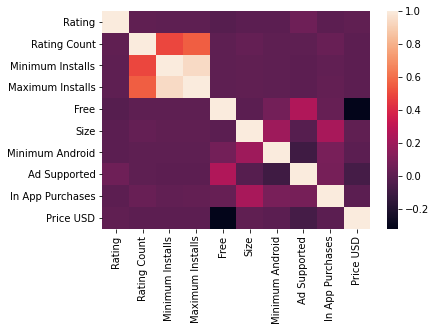

In [6]:
sns.heatmap(datos.corr())

Al observar los datos establecidos en las matrices de correlación y de covarianza se puede determinar que no existe relación entre rating y ninguna de las demás variables independientes. A pesar de lo anterior, se procederá a observar el comportamiento del dataset frente a aprendizaje supervisado, mediante Decision Tree, Random Forest y Linear Regression.

In [7]:
datos2 = pd.read_csv('GooglePlayStore_Preprocesed.csv', sep = ',', parse_dates = ['Released', 'Last Updated'])

C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



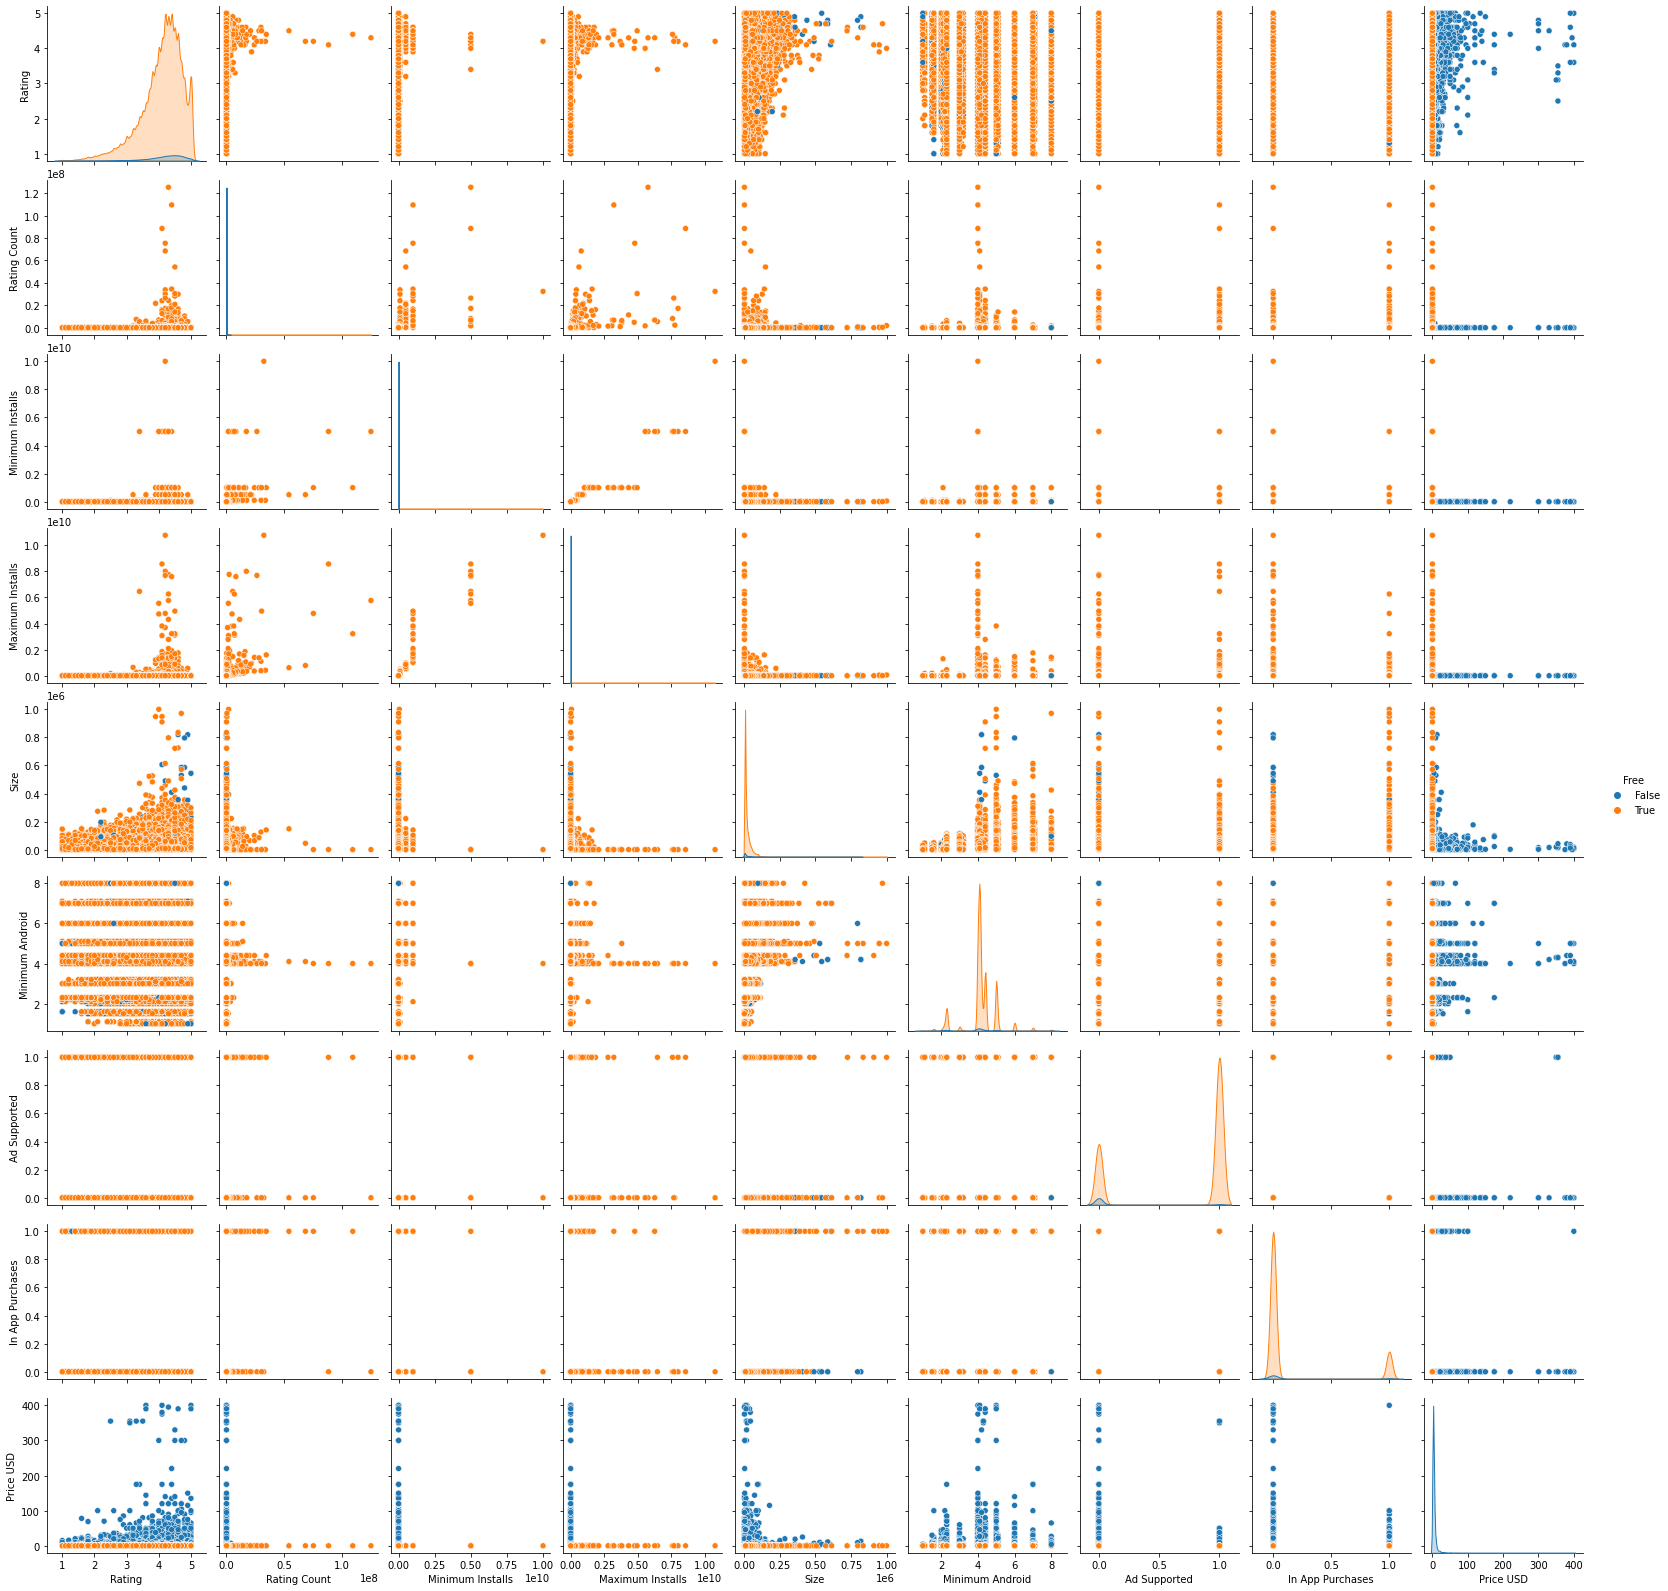

In [216]:
sns.pairplot(datos2, hue = 'Free')

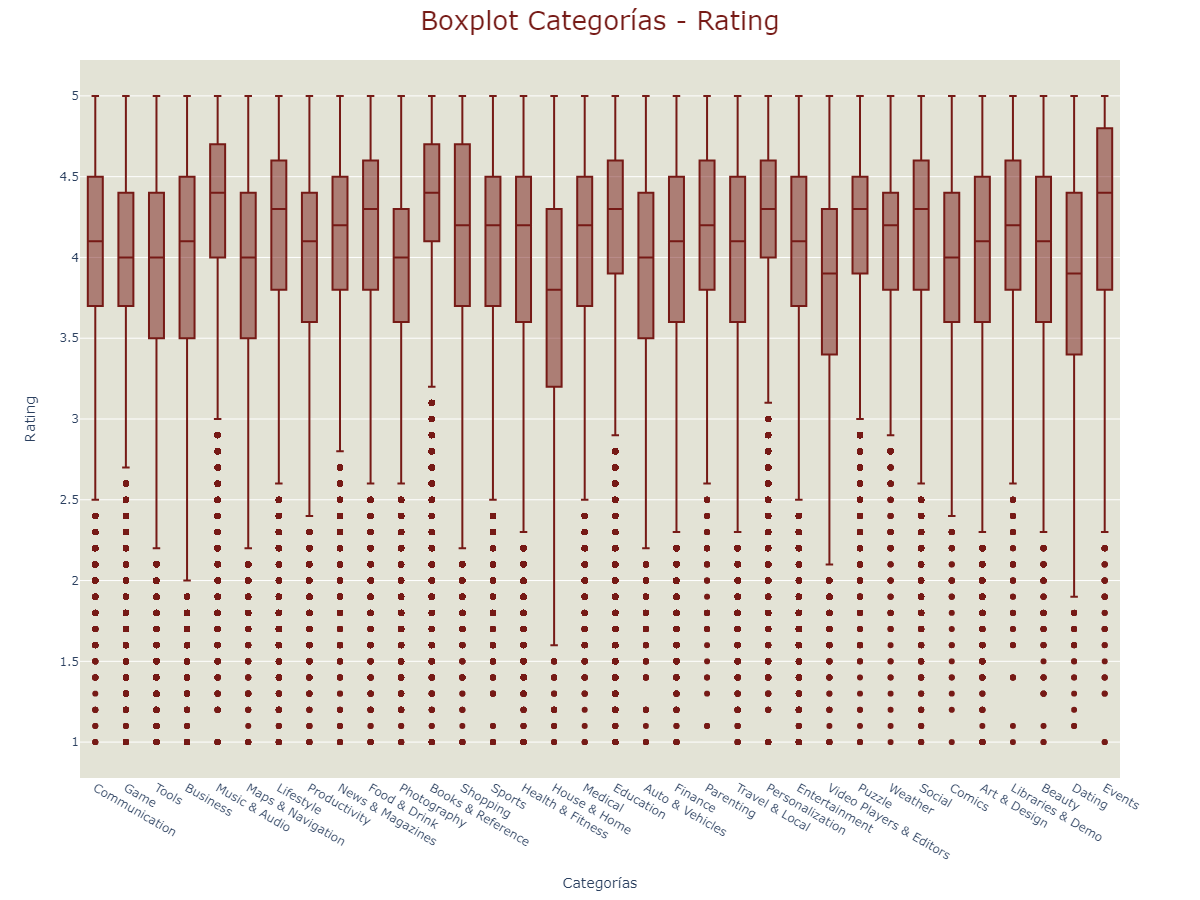

In [8]:
boxplot_categories_rating = px.box(x = datos2['Category'], y = datos2['Rating'], color_discrete_sequence = ['#761A16'])
boxplot_categories_rating.update_layout(
    height = 900,
    width = 1200,
    title = dict(text = 'Boxplot Categorías - Rating', x = 0.5, font = dict(size = 26, color = '#761A16')),
    xaxis_title = 'Categorías',
    yaxis_title = 'Rating',
    plot_bgcolor = '#E3E3D6',
)
boxplot_categories_rating.show(renderer = 'png')

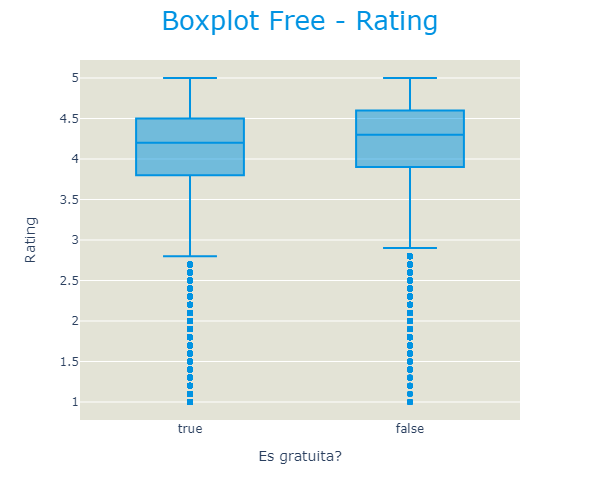

In [9]:
boxplot_free_rating = px.box(x = datos2['Free'], y = datos2['Rating'], color_discrete_sequence = ['#0093E2'])
boxplot_free_rating.update_layout(
    height = 500,
    width = 600,
    title = dict(text = 'Boxplot Free - Rating', x = 0.5, font = dict(size = 26, color = '#0093E2')),
    xaxis_title = 'Es gratuita?',
    yaxis_title = 'Rating',
    plot_bgcolor = '#E3E3D6',
)
boxplot_free_rating.show(renderer = 'png')

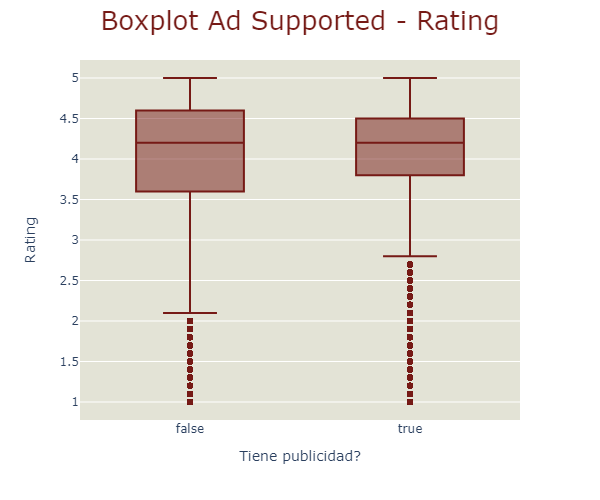

In [10]:
boxplot_ad_rating = px.box(x = datos2['Ad Supported'], y = datos2['Rating'], color_discrete_sequence = ['#761A16'])
boxplot_ad_rating.update_layout(
    height = 500,
    width = 600,
    title = dict(text = 'Boxplot Ad Supported - Rating', x = 0.5, font = dict(size = 26, color = '#761A16')),
    xaxis_title = 'Tiene publicidad?',
    yaxis_title = 'Rating',
    plot_bgcolor = '#E3E3D6',
)
boxplot_ad_rating.show(renderer = 'png')

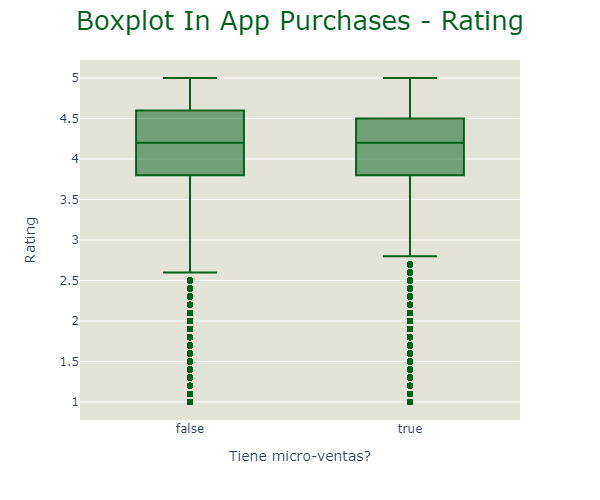

In [11]:
boxplot_inapp_rating = px.box(x = datos2['In App Purchases'], y = datos2['Rating'], color_discrete_sequence = ['#00621a'])
boxplot_inapp_rating.update_layout(
    height = 500,
    width = 600,
    title = dict(text = 'Boxplot In App Purchases - Rating', x = 0.5, font = dict(size = 26, color = '#00621a')),
    xaxis_title = 'Tiene micro-ventas?',
    yaxis_title = 'Rating',
    plot_bgcolor = '#E3E3D6',
)
boxplot_inapp_rating.show(renderer = 'png')

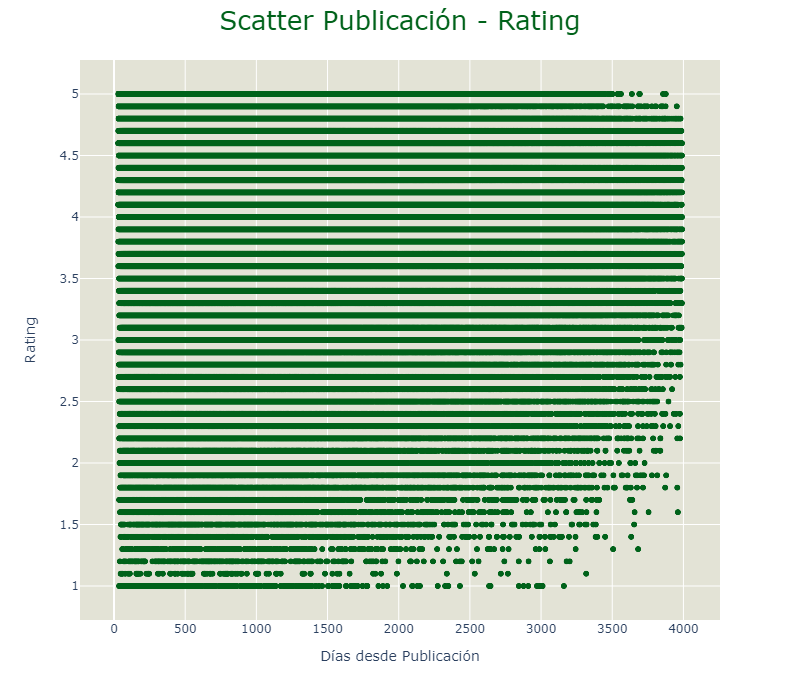

In [12]:
scatter_released_rating = px.scatter(x =(pd.to_datetime('2020-12-31') - datos2['Released']).dt.days,
                                     y = datos2['Rating'], color_discrete_sequence = ['#00621a'])
scatter_released_rating.update_layout(
    height = 700,
    width = 800,
    title = dict(text = 'Scatter Publicación - Rating', x = 0.5, font = dict(size = 26, color = '#00621a')),
    xaxis_title = 'Días desde Publicación',
    yaxis_title = 'Rating',
    plot_bgcolor = '#E3E3D6',
)
scatter_released_rating.show(renderer = 'png')

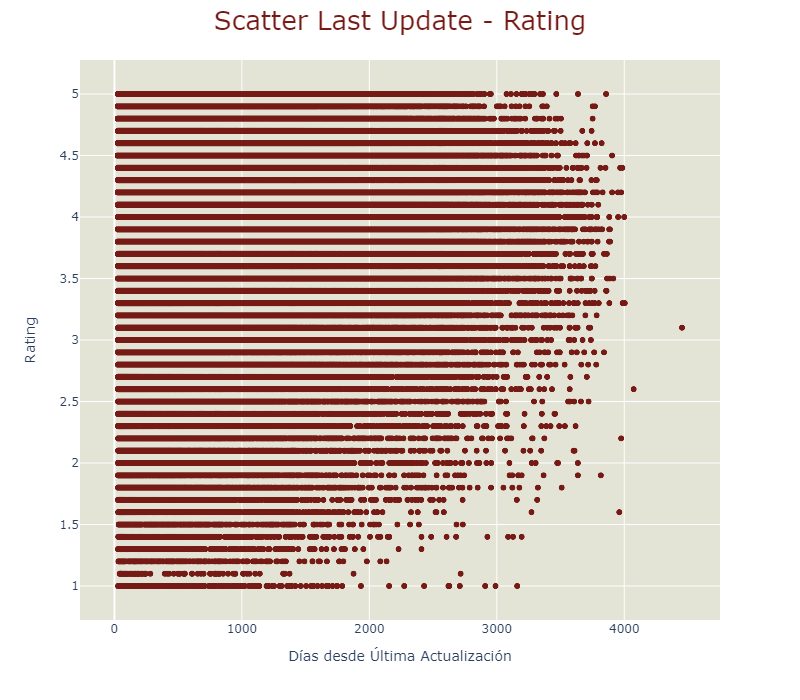

In [13]:
scatter_lastupdate_rating = px.scatter(x =(pd.to_datetime('2020-12-31') - datos2['Last Updated']).dt.days,
                                     y = datos2['Rating'], color_discrete_sequence = ['#761A16'])
scatter_lastupdate_rating.update_layout(
    height = 700,
    width = 800,
    title = dict(text = 'Scatter Last Update - Rating', x = 0.5, font = dict(size = 26, color = '#761A16')),
    xaxis_title = 'Días desde Última Actualización',
    yaxis_title = 'Rating',
    plot_bgcolor = '#E3E3D6',
)
scatter_lastupdate_rating.show(renderer = 'png')

# 2. CONVERSIÓN DE PROPIEDADES CUALITATIVAS O CATEGÓRICAS

In [14]:
categories = pd.get_dummies(datos.Category)
categories

,Art & Design,Auto & Vehicles,Beauty,Books & Reference,Business,Comics,Communication,Dating,Education,Entertainment,...,Photography,Productivity,Puzzle,Shopping,Social,Sports,Tools,Travel & Local,Video Players & Editors,Weather
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676329,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
676330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
676331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
676332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
datos = datos.drop(datos[datos['Content Rating'] == 'Unrated'].index)
content_rating_cols = pd.get_dummies(datos['Content Rating'])
content_rating_cols

,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
676329,0,1,0,0,0
676330,0,1,0,0,0
676331,0,1,0,0,0
676332,0,1,0,0,0


In [16]:
datos = pd.concat([datos, categories, content_rating_cols], axis = 1)
datos.drop(columns = ['Category', 'Content Rating'], inplace = True)
datos

,App Id,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Size,Minimum Android,Released,Last Updated,...,Sports,Tools,Travel & Local,Video Players & Editors,Weather,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
0,com.httrack.android,3.6,2848.0,100000.0,351560.0,True,2700.0,2.3,2013-08-12,2017-05-20,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
1,com.skizze.wwii,4.3,17297.0,1000000.0,2161778.0,True,86000.0,5.1,2018-07-19,2020-11-26,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2,com.themausoft.wpsapp,4.2,488639.0,50000000.0,79304739.0,True,5800.0,4.1,2016-03-07,2020-10-21,...,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0
3,com.mobisystems.office,4.2,1224420.0,100000000.0,163660067.0,True,59000.0,4.4,2011-12-22,2020-11-23,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
4,com.arthelion.loudplayer,4.2,665.0,50000.0,73463.0,True,29000.0,5.0,2016-09-24,2020-11-22,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676329,com.varbin.dsr,3.7,6.0,1000.0,2998.0,True,6800.0,4.0,2017-01-12,2017-04-05,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676330,com.RandoS.WallJump,5.0,7.0,50.0,62.0,True,15000.0,4.4,2020-05-27,2020-06-08,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676331,com.nivida.user.Boss,4.2,10.0,1000.0,3323.0,True,8300.0,4.1,2017-02-08,2018-10-15,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676332,com.varbin.shreesensamaj,4.6,36.0,1000.0,4258.0,True,12000.0,4.1,2017-12-11,2017-12-13,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0


In [17]:
datos['Released'] = (pd.to_datetime('2020-12-31') - datos['Released']).dt.days
datos['Last Updated'] = (pd.to_datetime('2020-12-31') - datos['Last Updated']).dt.days
datos['Free'].replace({True: 1, False: 0}, inplace = True)
datos['In App Purchases'].replace({True: 1, False: 0}, inplace = True)
datos['Ad Supported'].replace({True: 1, False: 0}, inplace = True)
datos

,App Id,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Size,Minimum Android,Released,Last Updated,...,Sports,Tools,Travel & Local,Video Players & Editors,Weather,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
0,com.httrack.android,3.6,2848.0,100000.0,351560.0,1.0,2700.0,2.3,2698.0,1321.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
1,com.skizze.wwii,4.3,17297.0,1000000.0,2161778.0,1.0,86000.0,5.1,896.0,35.0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2,com.themausoft.wpsapp,4.2,488639.0,50000000.0,79304739.0,1.0,5800.0,4.1,1760.0,71.0,...,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0
3,com.mobisystems.office,4.2,1224420.0,100000000.0,163660067.0,1.0,59000.0,4.4,3297.0,38.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
4,com.arthelion.loudplayer,4.2,665.0,50000.0,73463.0,1.0,29000.0,5.0,1559.0,39.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676329,com.varbin.dsr,3.7,6.0,1000.0,2998.0,1.0,6800.0,4.0,1449.0,1366.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676330,com.RandoS.WallJump,5.0,7.0,50.0,62.0,1.0,15000.0,4.4,218.0,206.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676331,com.nivida.user.Boss,4.2,10.0,1000.0,3323.0,1.0,8300.0,4.1,1422.0,808.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676332,com.varbin.shreesensamaj,4.6,36.0,1000.0,4258.0,1.0,12000.0,4.1,1116.0,1114.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0


In [18]:
datos.corr()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Size,Minimum Android,Released,Last Updated,Ad Supported,...,Sports,Tools,Travel & Local,Video Players & Editors,Weather,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
Rating,1.000000,0.008342,0.003266,0.003999,-0.024500,-0.006376,-0.007304,-0.067655,-0.052685,0.053587,...,-0.011877,-0.077050,-0.019350,-0.043370,-0.002051,1.287127e-03,0.001996,-0.005088,-0.013052,0.007667
Rating Count,0.008342,1.000000,0.489726,0.551979,0.004019,0.022392,0.003343,0.031608,-0.015194,0.001169,...,0.002129,0.000215,-0.002040,0.006872,0.000407,2.043878e-04,-0.016995,0.012368,0.003932,0.012250
Minimum Installs,0.003266,0.489726,1.000000,0.938968,0.003733,0.005682,0.004045,0.025957,-0.011785,-0.003319,...,-0.000105,0.007206,-0.001170,0.007999,-0.000066,-5.894071e-05,-0.007382,0.003385,0.000152,0.007188
Maximum Installs,0.003999,0.551979,0.938968,1.000000,0.004346,0.006728,0.004338,0.029353,-0.013759,-0.003570,...,-0.000048,0.007530,-0.001101,0.008046,0.000099,-3.906497e-05,-0.008840,0.004158,0.000041,0.008639
Free,-0.024500,0.004019,0.003733,0.004346,1.000000,-0.009328,0.067185,-0.164591,-0.123889,0.253882,...,-0.008371,-0.022492,0.005517,0.000392,-0.010663,1.409829e-03,-0.014185,-0.026314,0.016555,0.019844
Size,-0.006376,0.022392,0.005682,0.006728,-0.009328,1.000000,0.196163,-0.130449,-0.179573,-0.026099,...,0.020662,-0.114405,0.018223,0.003782,-0.003351,4.572141e-03,-0.113523,0.086927,0.010903,0.088730
Minimum Android,-0.007304,0.003343,0.004045,0.004338,0.067185,0.196163,1.000000,-0.306273,-0.597328,-0.099786,...,0.014165,0.007051,0.034472,0.017487,0.034141,2.841214e-03,-0.027820,0.005089,0.024619,0.016515
Released,-0.067655,0.031608,0.025957,0.029353,-0.164591,-0.130449,-0.306273,1.000000,0.471801,-0.162866,...,0.035440,0.006635,0.053157,-0.012914,0.035015,-8.847329e-04,0.069796,0.019013,-0.049757,-0.063804
Last Updated,-0.052685,-0.015194,-0.011785,-0.013759,-0.123889,-0.179573,-0.597328,0.471801,1.000000,-0.067678,...,-0.002292,0.021406,-0.004519,-0.006015,-0.009270,-9.168429e-04,0.073888,-0.009303,-0.045049,-0.058005
Ad Supported,0.053587,0.001169,-0.003319,-0.003570,0.253882,-0.026099,-0.099786,-0.162866,-0.067678,1.000000,...,0.001720,-0.042842,-0.094119,0.012117,0.001557,2.821066e-04,-0.113626,0.032010,0.049665,0.092331


<AxesSubplot:>

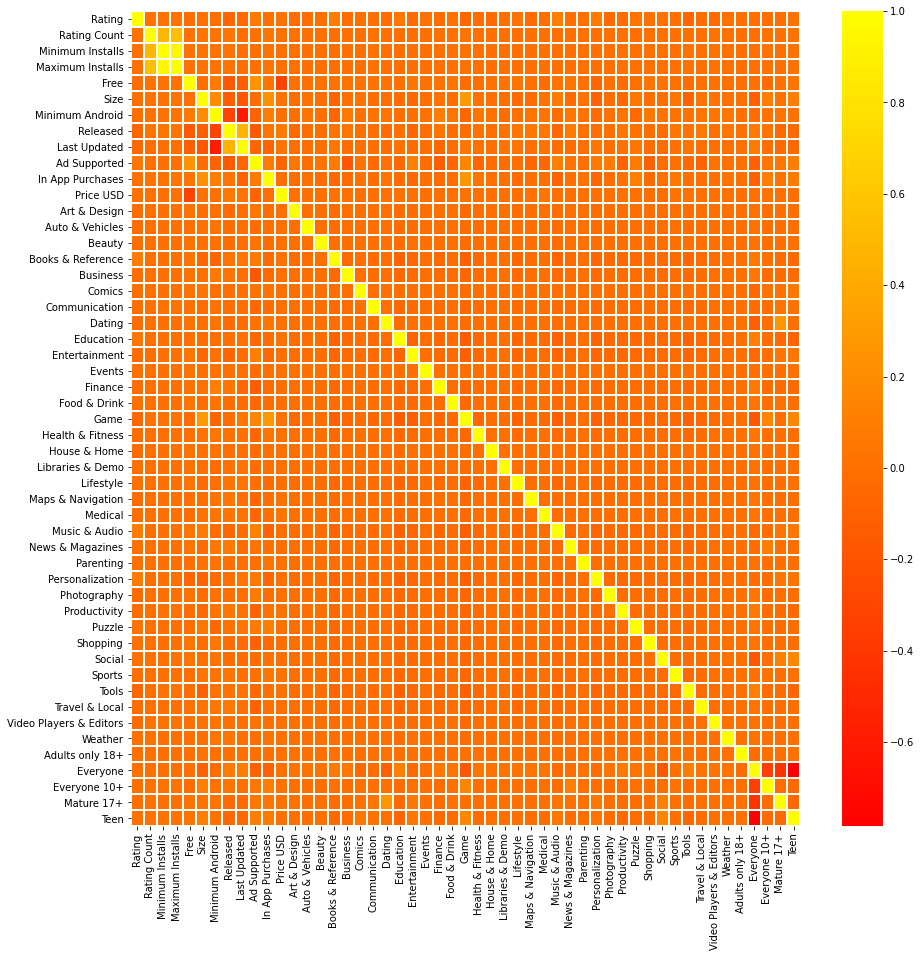

In [19]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(datos.corr(), ax = ax, linewidths = 0.1, cmap = 'autumn')

La gran mayoría de los valores están correlacionados entre 0 y 0.2, lo que implica que es muy probable que no exista relación alguna entre las variables dadas.

In [21]:
datos = datos[datos['Rating'].notnull()]

# 4. OBTENER CONJUNTO X E Y - OBTENER CONJUNTOS TRAIN, TEST Y VALIDACIÓN

In [22]:
x_data = datos.drop(columns = ['App Id', 'Rating'])
x_data

,Rating Count,Minimum Installs,Maximum Installs,Free,Size,Minimum Android,Released,Last Updated,Ad Supported,In App Purchases,...,Sports,Tools,Travel & Local,Video Players & Editors,Weather,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
0,2848.0,100000.0,351560.0,1.0,2700.0,2.3,2698.0,1321.0,0.0,0.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
1,17297.0,1000000.0,2161778.0,1.0,86000.0,5.1,896.0,35.0,1.0,1.0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2,488639.0,50000000.0,79304739.0,1.0,5800.0,4.1,1760.0,71.0,1.0,0.0,...,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0
3,1224420.0,100000000.0,163660067.0,1.0,59000.0,4.4,3297.0,38.0,1.0,1.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
4,665.0,50000.0,73463.0,1.0,29000.0,5.0,1559.0,39.0,0.0,0.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676329,6.0,1000.0,2998.0,1.0,6800.0,4.0,1449.0,1366.0,1.0,0.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676330,7.0,50.0,62.0,1.0,15000.0,4.4,218.0,206.0,1.0,0.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676331,10.0,1000.0,3323.0,1.0,8300.0,4.1,1422.0,808.0,0.0,0.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676332,36.0,1000.0,4258.0,1.0,12000.0,4.1,1116.0,1114.0,0.0,0.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0


In [23]:
y_real_labels = datos['Rating']
y_real_labels

0         3.6
1         4.3
2         4.2
3         4.2
4         4.2
         ... 
676329    3.7
676330    5.0
676331    4.2
676332    4.6
676333    4.6
Name: Rating, Length: 676276, dtype: float64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_real_labels, test_size = 0.4, random_state = 1000)

In [25]:
x_train.shape

(405765, 50)

In [26]:
y_train

599773    4.6
330948    3.0
155678    4.5
421171    3.3
249793    4.8
         ... 
18782     4.2
376077    3.1
134853    4.6
71755     3.0
107960    4.7
Name: Rating, Length: 405765, dtype: float64

In [27]:
x_test.shape

(270511, 50)

In [28]:
y_test

240410    3.0
645704    5.0
385064    2.7
81542     4.1
605442    4.6
         ... 
671747    2.5
127966    4.4
193461    4.2
569690    4.5
657120    2.1
Name: Rating, Length: 270511, dtype: float64

# 5. APRENDIZAJE SUPERVISADO

### Funciones

In [29]:
def create_df_metrics_regresion(metrics, model_name):
    index_metrics_regr = ['Tiempo de Entrenamiento', 'Error Absoluto Medio (Test)', 'Error Absoluto Medio (Train)',
                          'Error Cuadrático Medio (Test)', 'Error Cuadrático Medio (Train)', 'RMSE (Test)', 'RMSE (Train)',
                          'R2 Score (Test)', 'R2 Score (Train)']

    df = pd.DataFrame(columns = [model_name], index = index_metrics_regr)
    df[model_name] = metrics.values()
    return df

In [30]:
def styler_df(df):
    df_styled = df.style\
        .set_properties(**{'background-color': '#E3E3E3', 'color': 'black', 'font-style': 'italic', 'font-size': '80%'})\
        .set_table_styles([dict(selector='td', props=[('text-align', 'center'), ('font-weight', 'bold')]),
                           dict(selector='th', props=[('background-color', '#51639E'), ('font-size', '80%'),
                                                      ('font-weight', 'bold'), ('color', 'white')]),
                           dict(selector='td:hover', props=[('background-color', '#FBBCBC')])])
    return df_styled

In [31]:
def train_regression_models(model, train_x, train_y, test_x, test_y):
    time_i = datetime.now()

    trained_model = model.fit(train_x, train_y)
    y_pred_test = trained_model.predict(test_x)
    y_pred_train = trained_model.predict(train_x)

    time_training = datetime.now() - time_i

    return model, {
        'time': time_training,
        'test_mae': round(mean_absolute_error(test_y, y_pred_test), 5),
        'train_mae': round(mean_absolute_error(train_y, y_pred_train), 5),
        'test_mse': round(mean_squared_error(test_y, y_pred_test), 5),
        'train_mse': round(mean_squared_error(train_y, y_pred_train), 5),
        'test_rmse': round(mean_squared_error(test_y, y_pred_test, squared = False), 5),
        'train_rmse': round(mean_squared_error(train_y, y_pred_train, squared = False), 5),
        'test_r2': round(r2_score(test_y, y_pred_test), 5),
        'train_r2': round(r2_score(train_y, y_pred_train), 5)
    }

In [32]:
def graph_feature_importance(data, importance, model_name, bars_color = '#761A16', title_color = '#761A16', range = (0, 0.5)):
    sorted_id = importance.argsort()

    features = go.Figure()
    features.add_trace(go.Bar(
        y = data.columns[sorted_id][len(data.columns) - 15: len(data.columns) + 1],
        x = importance[sorted_id][len(importance) - 15: len(importance) + 1],
        marker = dict(color = bars_color),
        orientation = 'h',
        textfont = dict(color = bars_color, size = 10),
        textposition = 'outside',
        texttemplate = [f'{y:.5f}' for y in importance[sorted_id][len(importance) - 15: len(importance) + 1]]
    ))
    features.update_layout(
        height = 650,
        width = 800,
        margin = dict(r = 40),
        plot_bgcolor = '#E3E3D6',
        title = dict(
            font = dict(size = 26, color = title_color),
            text = f'Importancia de Características en {model_name}<br>para el Rating de una Aplicación',
            x = 0.5,
        ),
        xaxis = dict(
            range = range,
            title_text = 'Relevancia'
        )
    )
    features.show(renderer = 'svg')

In [33]:
def graph_regression(model, x, y, title, colors = ['#00621A', '#143A1F']):
    pred = model.predict(x)
    pred[pred > 5] = 5
    pred[pred < 1] = 1
    lr = px.scatter(
        x = y, y = pred, color_discrete_sequence = [colors[0]],
        trendline = 'ols', trendline_color_override = colors[1]
    )
    lr.update_layout(
        height = 600,
        width = 800,
        margin = dict(r = 40, b = 60),
        xaxis_title = 'Rating Verdadero',
        yaxis_title = 'Rating Predecido',
        plot_bgcolor = '#E3E3D6',
        title = dict(
            font = dict(size = 26, color = colors[0]),
            text = title,
            x = 0.5,
        )
    )
    lr.show(renderer = 'png')

In [34]:
def graph_residuals(model, x, y, title, colors = ['#00621A', '#143A1F']):
    pred = model.predict(x)
    pred[pred > 5] = 5
    pred[pred < 1] = 1
    lr = px.scatter(
        x = pred, y = (pred - y), marginal_y = 'violin', color_discrete_sequence = [colors[0]],
        trendline = 'ols', trendline_color_override = colors[1]
    )
    lr.update_layout(
        height = 600,
        width = 800,
        margin = dict(r = 40, b = 60),
        xaxis_title = 'Rating Predecido',
        yaxis_title = 'Residual',
        plot_bgcolor = '#E3E3D6',
        title = dict(
            font = dict(size = 26, color = colors[0]),
            text = title,
            x = 0.5,
        )
    )
    lr.show(renderer = 'png')

## 5.1. REGRESIÓN LINEAL

In [35]:
lineal = LinearRegression()

In [36]:
lineal, linear_metrics_i = train_regression_models(lineal, x_train, y_train, x_test, y_test)

In [37]:
df_metrics_linear = create_df_metrics_regresion(linear_metrics_i, 'Linear Regression')
df_metrics_linear_styled = styler_df(df_metrics_linear)
df_metrics_linear_styled

,Linear Regression
Tiempo de Entrenamiento,0:00:01.171635
Error Absoluto Medio (Test),0.475060
Error Absoluto Medio (Train),0.475600
Error Cuadrático Medio (Test),0.396130
Error Cuadrático Medio (Train),0.396230
RMSE (Test),0.629390
RMSE (Train),0.629470
R2 Score (Test),0.054800
R2 Score (Train),0.054950


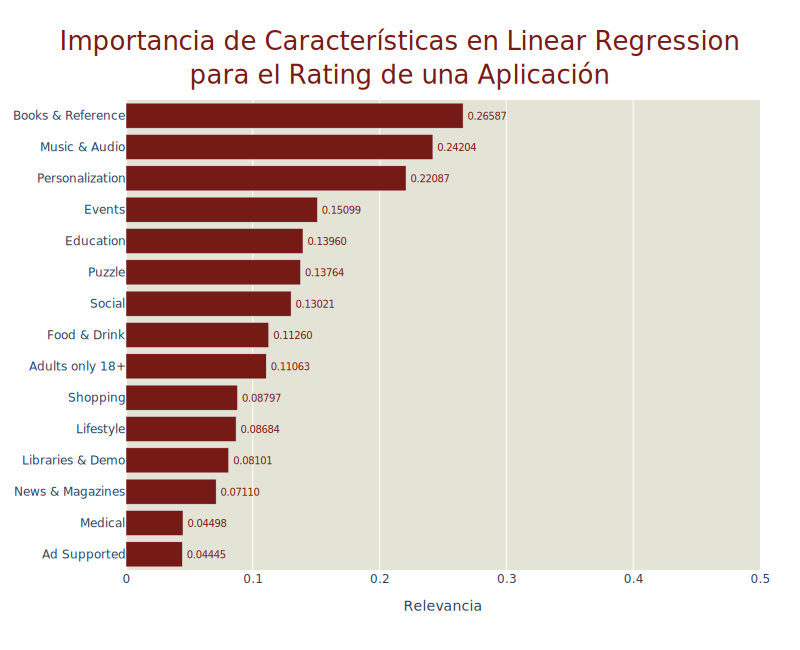

In [38]:
graph_feature_importance(x_data, lineal.coef_, 'Linear Regression')

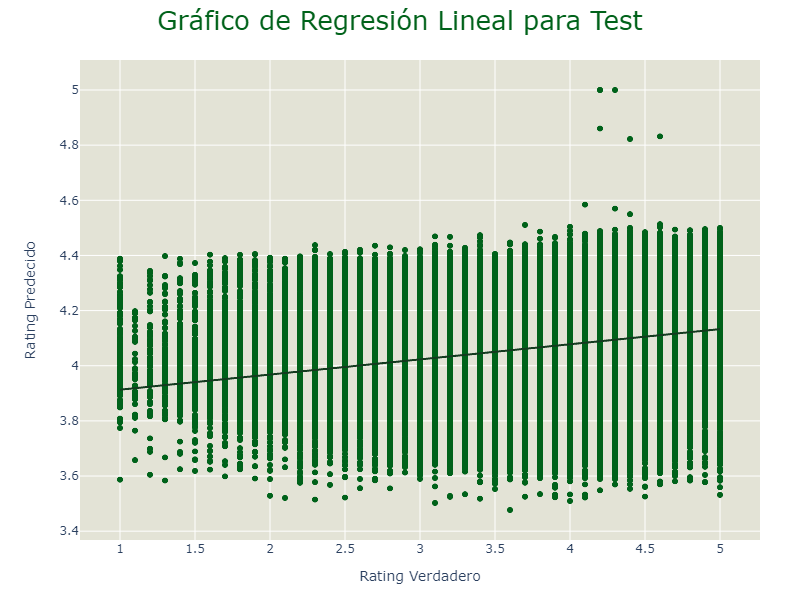

In [39]:
graph_regression(lineal, x_test, y_test, 'Gráfico de Regresión Lineal para Test')

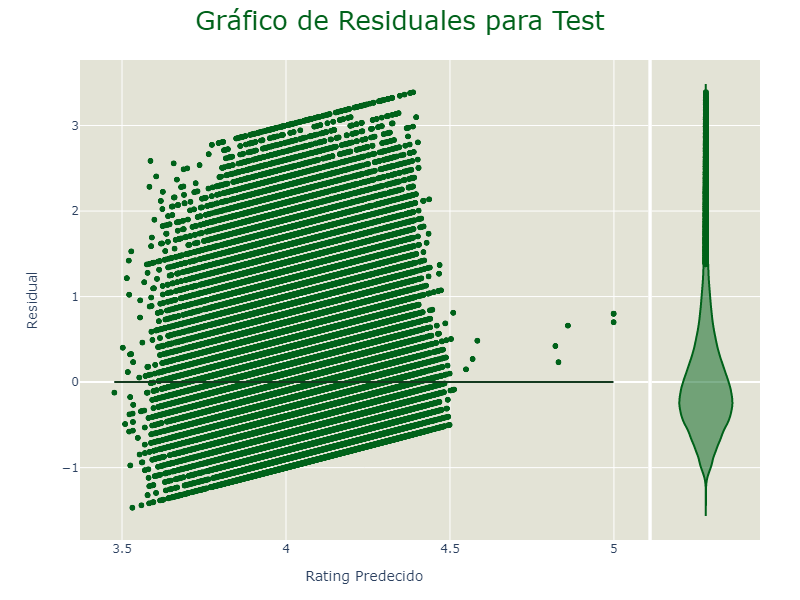

In [40]:
graph_residuals(lineal, x_test, y_test, 'Gráfico de Residuales para Test')

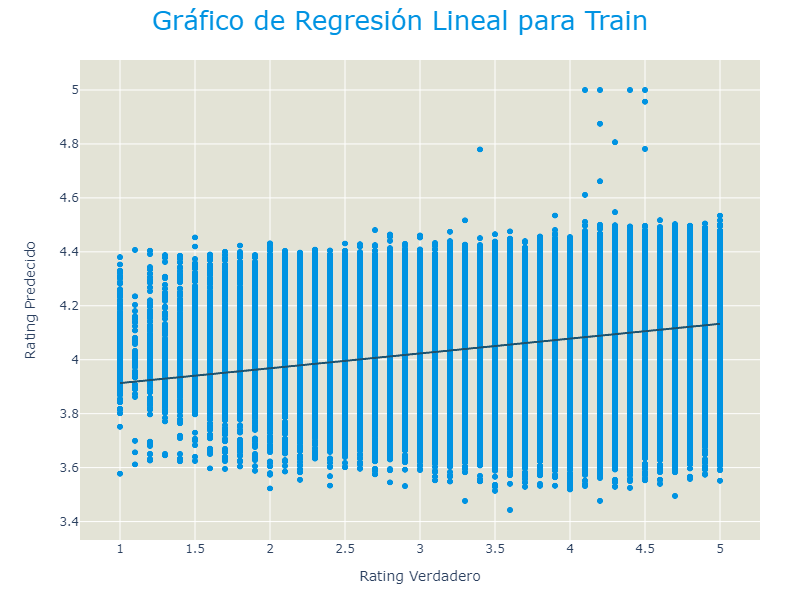

In [41]:
graph_regression(lineal, x_train, y_train, 'Gráfico de Regresión Lineal para Train', colors = ['#0093E2', '#1D526E'])

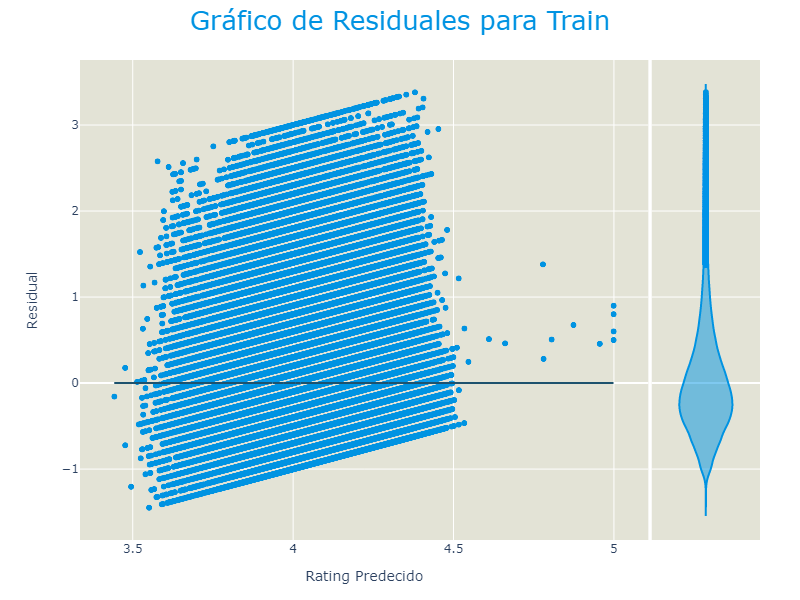

In [42]:
graph_residuals(lineal, x_train, y_train, 'Gráfico de Residuales para Train', colors = ['#0093E2', '#1D526E'])

## 5.2. ÁRBOL DE DECISIÓN

In [43]:
tree = DecisionTreeRegressor()

In [44]:
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [45]:
tree_params = {
    'max_depth': [5, 10, 15, 20, 25, 30, 50],
    'max_leaf_nodes': [5, 10, 20, 30, 50],
    'min_samples_leaf': [2, 5, 10, 20, 30, 50]
}

Búsqueda de mejor combinación del estimador dado el dataset.

Algoritmo demora aprox **5 a 7 min**.

In [46]:
tree_GSCV = GridSearchCV(tree, tree_params, n_jobs = -1)
tree_GSCV.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 50],
                         'max_leaf_nodes': [5, 10, 20, 30, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 30, 50]})

In [47]:
tree_GSCV.best_score_

0.1422985685581382

In [48]:
tree_best_model = tree_GSCV.best_estimator_
tree_best_model

DecisionTreeRegressor(max_depth=50, max_leaf_nodes=50, min_samples_leaf=50)

In [49]:
tree_best_model, metrics_tree = train_regression_models(tree_best_model, x_train, y_train, x_test, y_test)

In [50]:
df_metrics_tree = create_df_metrics_regresion(metrics_tree, 'Decision Tree')
df_metrics_tree_styled = styler_df(df_metrics_tree)
df_metrics_tree_styled

,Decision Tree
Tiempo de Entrenamiento,0:00:03.108176
Error Absoluto Medio (Test),0.446640
Error Absoluto Medio (Train),0.446060
Error Cuadrático Medio (Test),0.359610
Error Cuadrático Medio (Train),0.358270
RMSE (Test),0.599680
RMSE (Train),0.598560
R2 Score (Test),0.141940
R2 Score (Train),0.145490


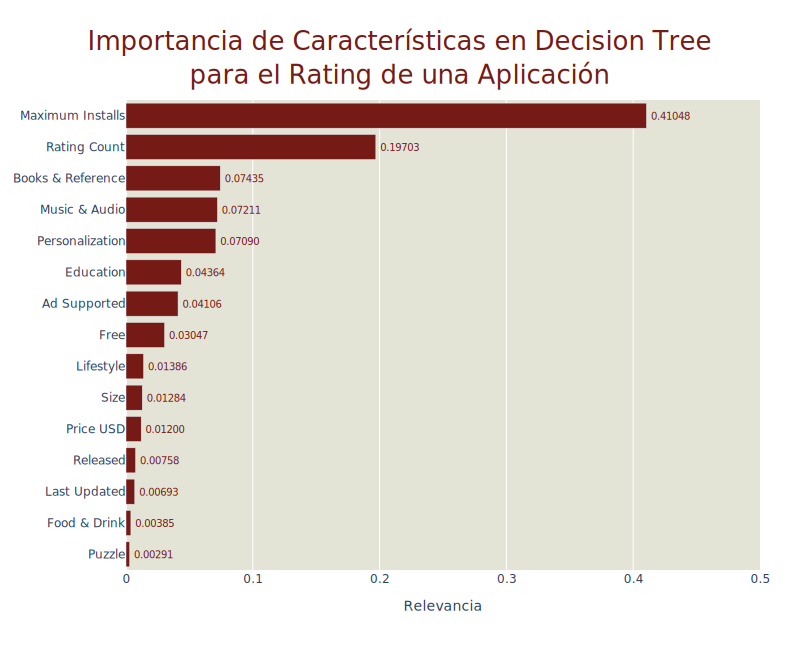

In [51]:
graph_feature_importance(x_data, tree_best_model.feature_importances_, 'Decision Tree')

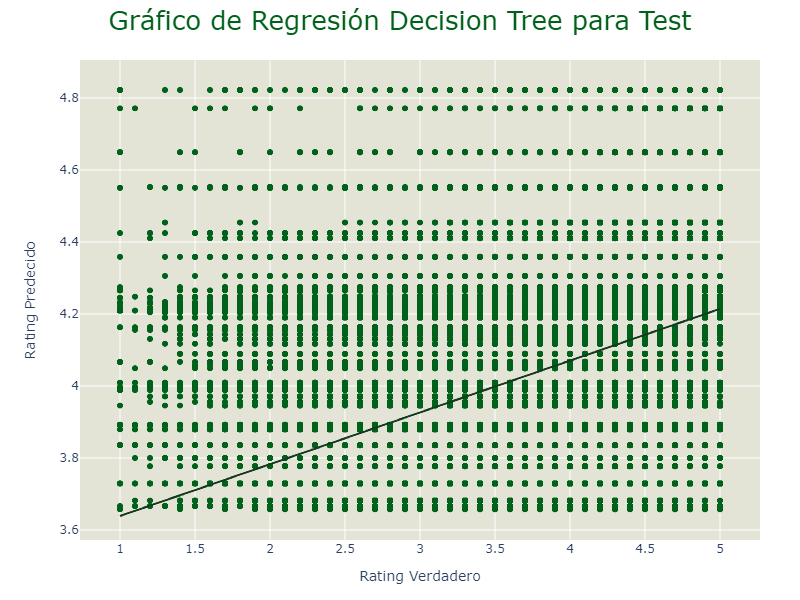

In [52]:
graph_regression(tree_best_model, x_test, y_test, 'Gráfico de Regresión Decision Tree para Test')

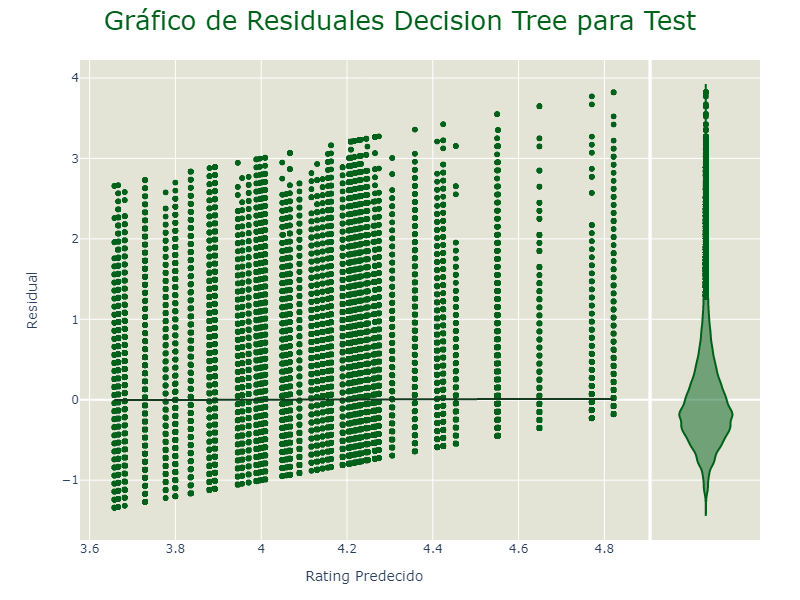

In [53]:
graph_residuals(tree_best_model, x_test, y_test, 'Gráfico de Residuales Decision Tree para Test')

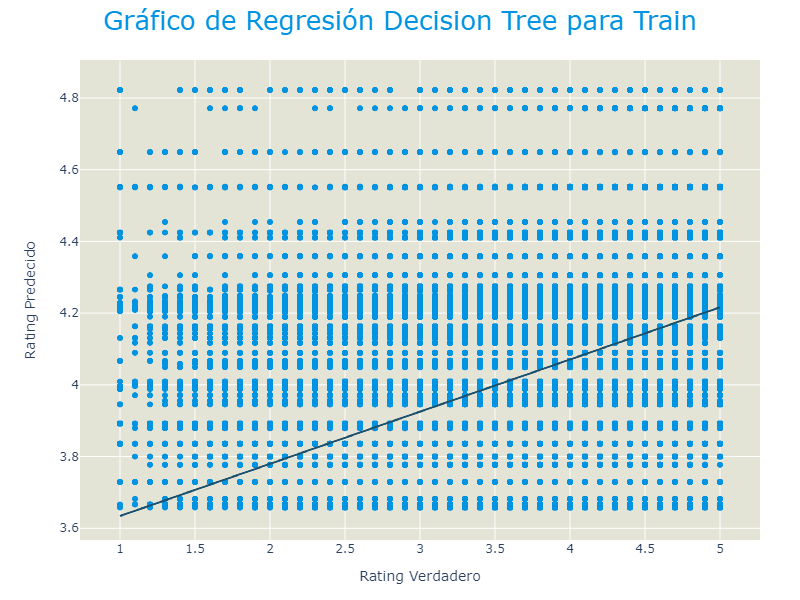

In [54]:
graph_regression(tree_best_model, x_train, y_train, 'Gráfico de Regresión Decision Tree para Train', colors = ['#0093E2', '#1D526E'])

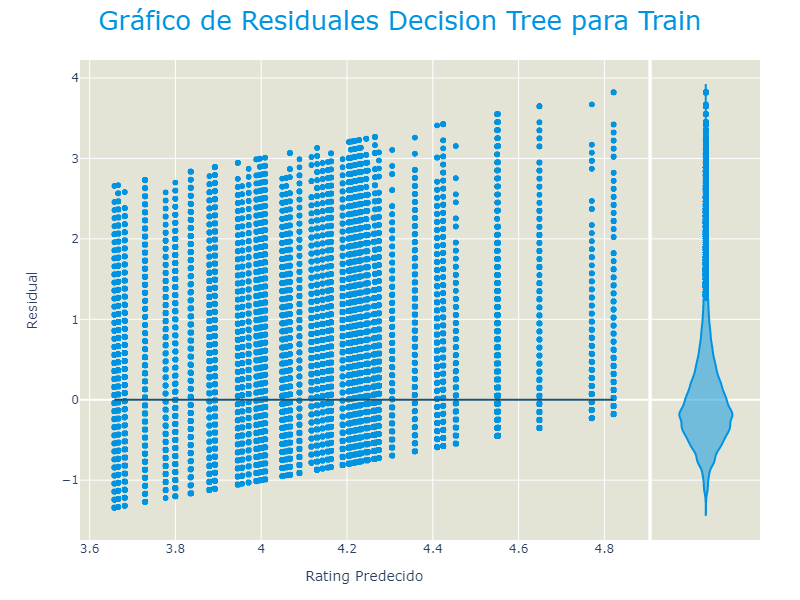

In [55]:
graph_residuals(tree_best_model, x_train, y_train, 'Gráfico de Residuales Decision Tree para Train', colors = ['#0093E2', '#1D526E'])

## 5.3. RANDOM FOREST

### 5.3.1. PRIMER ACERCAMIENTO

In [56]:
forest = RandomForestRegressor(max_depth = 9, n_estimators = 200)

In [57]:
forest, forest_metrics = train_regression_models(forest, x_train, y_train, x_test, y_test)

In [58]:
df_metrics_rf = create_df_metrics_regresion(forest_metrics, 'Random Forest')
df_metrics_rf_styled = styler_df(df_metrics_rf)
df_metrics_rf_styled

,Random Forest
Tiempo de Entrenamiento,0:05:42.116027
Error Absoluto Medio (Test),0.443760
Error Absoluto Medio (Train),0.441650
Error Cuadrático Medio (Test),0.355970
Error Cuadrático Medio (Train),0.351510
RMSE (Test),0.596630
RMSE (Train),0.592880
R2 Score (Test),0.150640
R2 Score (Train),0.161610


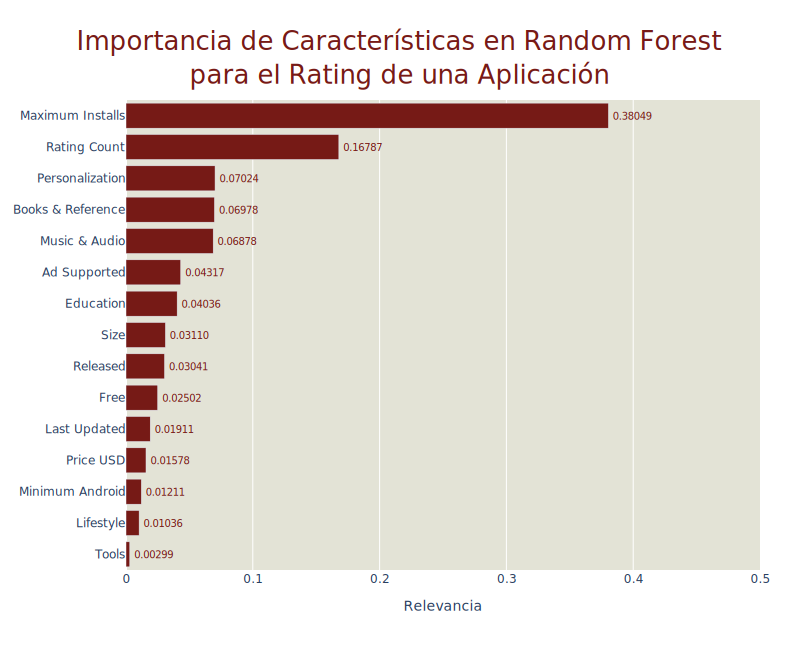

In [59]:
graph_feature_importance(x_data, forest.feature_importances_, 'Random Forest')

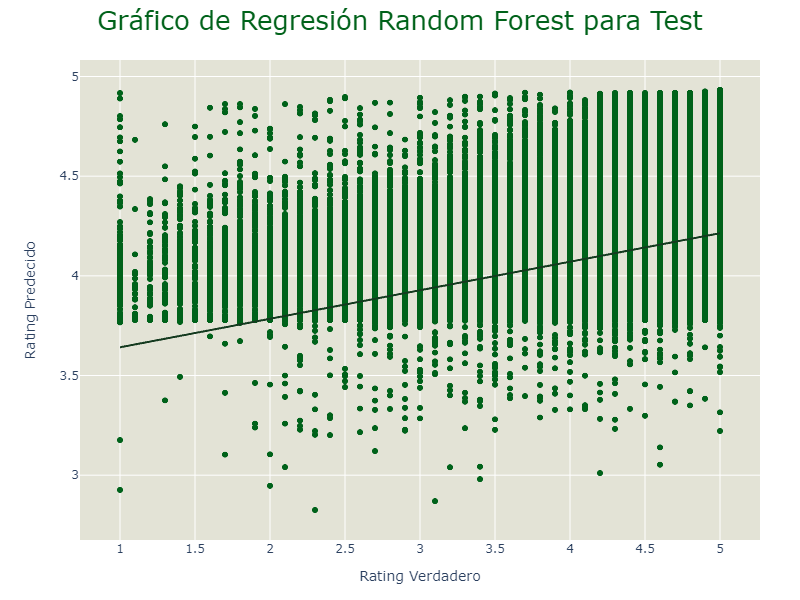

In [60]:
graph_regression(forest, x_test, y_test, 'Gráfico de Regresión Random Forest para Test')

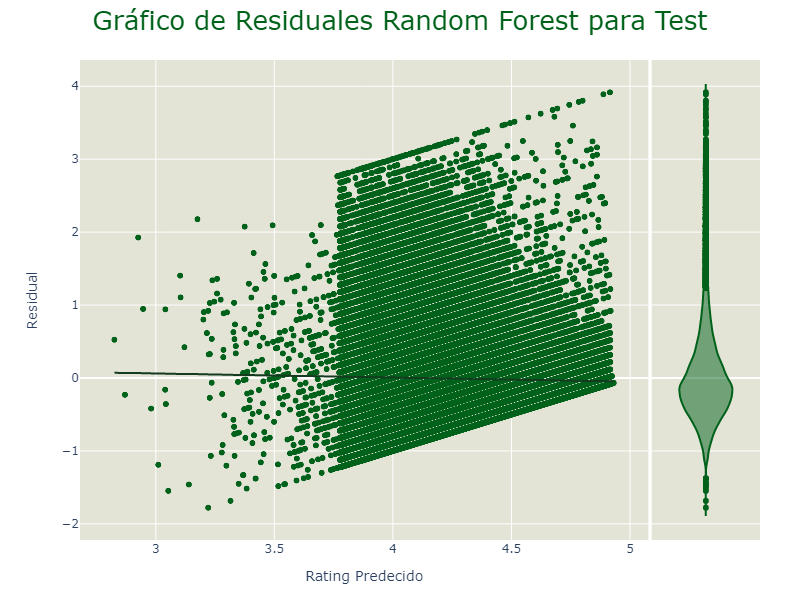

In [61]:
graph_residuals(forest, x_test, y_test, 'Gráfico de Residuales Random Forest para Test')

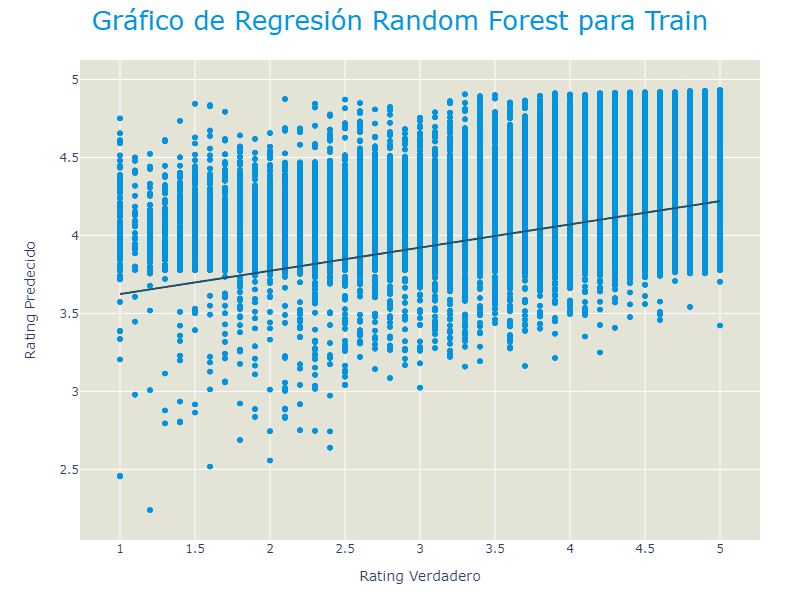

In [62]:
graph_regression(forest, x_train, y_train, 'Gráfico de Regresión Random Forest para Train', colors = ['#0093E2', '#1D526E'])

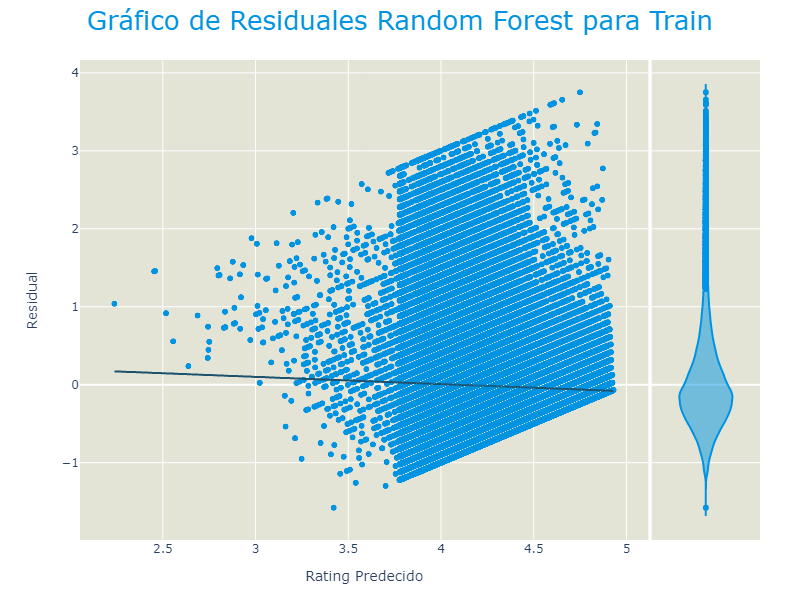

In [63]:
graph_residuals(forest, x_train, y_train, 'Gráfico de Residuales Random Forest para Train', colors = ['#0093E2', '#1D526E'])

### 5.3.2. BÚSQUEDA DEL MEJOR MODELO

In [64]:
rf = RandomForestRegressor()

In [65]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [12, 14, 16, 18]
}

****ATENCIÓN****: **Algoritmo demora entre 45 min y 90 minutos**

In [66]:
rf_GSCV = GridSearchCV(rf, rf_params, n_jobs = -1)
rf_GSCV.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [12, 14, 16, 18],
                         'n_estimators': [50, 100, 200]})

In [67]:
rf_GSCV.best_score_

0.20863987420107916

In [68]:
forest_best_model = rf_GSCV.best_estimator_
forest_best_model

RandomForestRegressor(max_depth=18, n_estimators=200)

In [69]:
forest_best_model, random_forest_metrics = train_regression_models(forest_best_model, x_train, y_train, x_test, y_test)

In [70]:
df_metrics_forest = create_df_metrics_regresion(random_forest_metrics, 'Random Forest GSCV')
df_metrics_forest_styled = styler_df(df_metrics_forest)
df_metrics_forest_styled

,Random Forest GSCV
Tiempo de Entrenamiento,0:10:15.578786
Error Absoluto Medio (Test),0.421410
Error Absoluto Medio (Train),0.370440
Error Cuadrático Medio (Test),0.330720
Error Cuadrático Medio (Train),0.255600
RMSE (Test),0.575080
RMSE (Train),0.505570
R2 Score (Test),0.210890
R2 Score (Train),0.390370


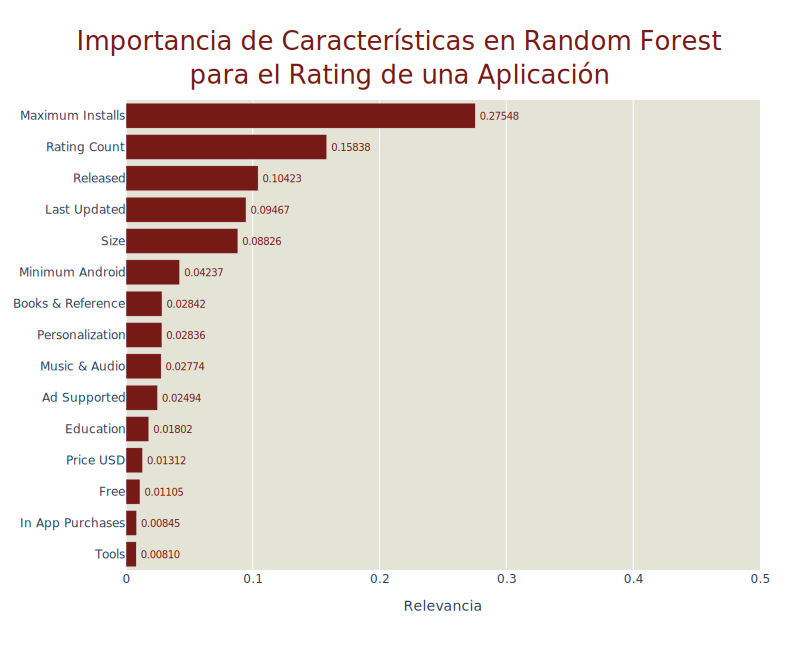

In [71]:
graph_feature_importance(x_data, forest_best_model.feature_importances_, 'Random Forest')

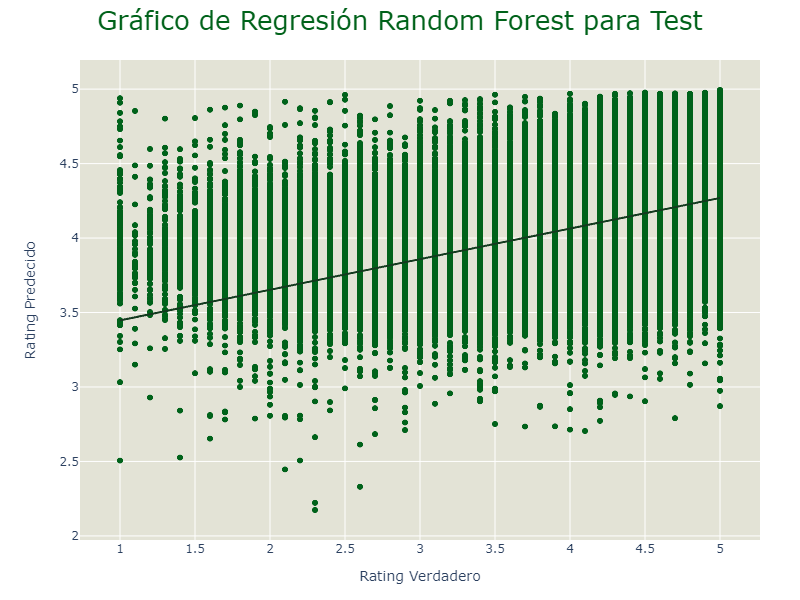

In [72]:
graph_regression(forest_best_model, x_test, y_test, 'Gráfico de Regresión Random Forest para Test')

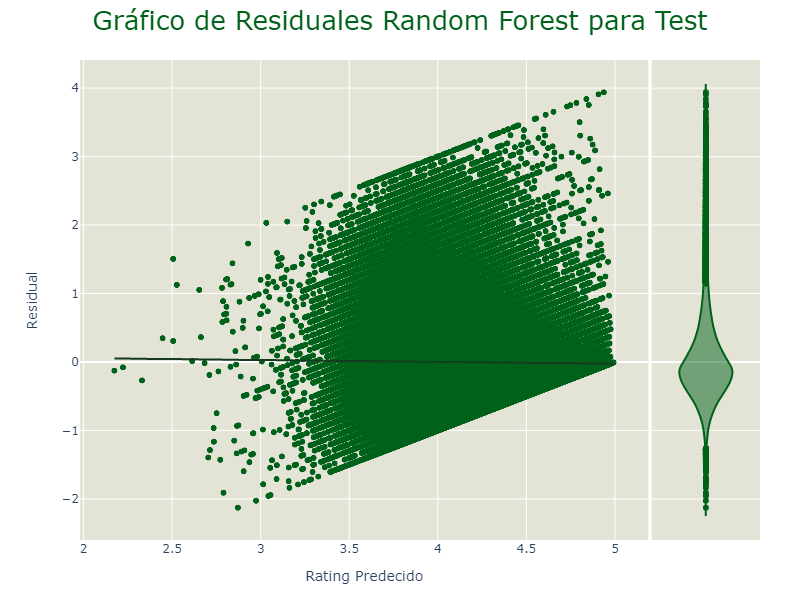

In [73]:
graph_residuals(forest_best_model, x_test, y_test, 'Gráfico de Residuales Random Forest para Test')

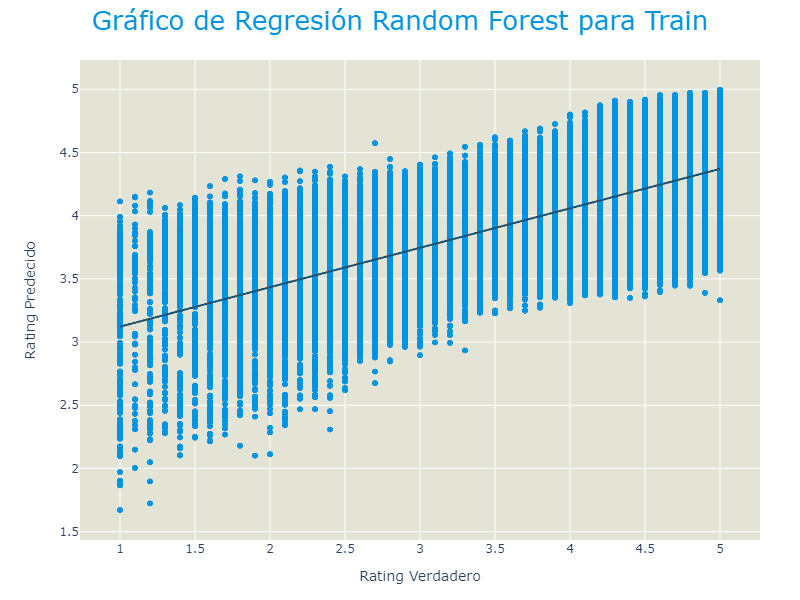

In [74]:
graph_regression(forest_best_model, x_train, y_train, 'Gráfico de Regresión Random Forest para Train', colors = ['#0093E2', '#1D526E'])

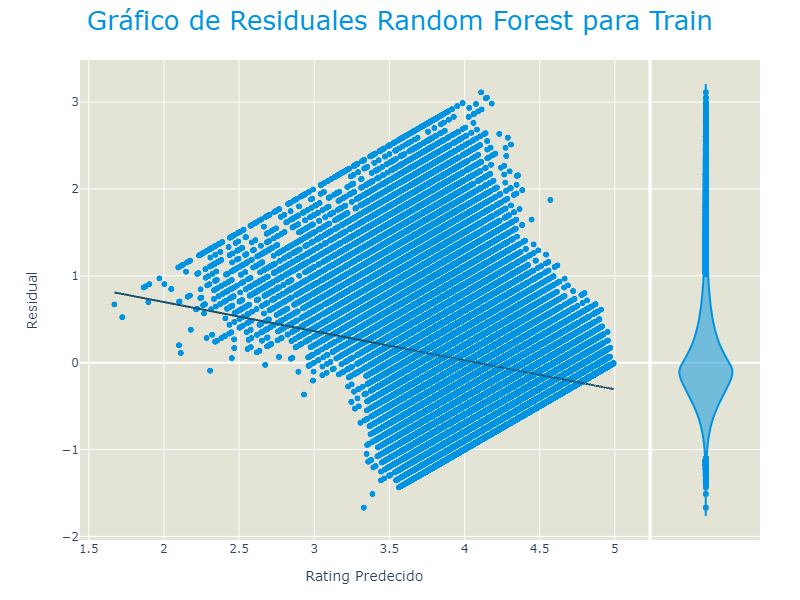

In [75]:
graph_residuals(forest_best_model, x_train, y_train, 'Gráfico de Residuales Random Forest para Train', colors = ['#0093E2', '#1D526E'])

## 5.4. COMPARATIVA DE MODELOS SUPERVISADOS

In [76]:
df_supervized = pd.concat([df_metrics_linear, df_metrics_tree, df_metrics_rf, df_metrics_forest], axis = 1)
df_supervized_styled = styler_df(df_supervized)
df_supervized_styled

,Linear Regression,Decision Tree,Random Forest,Random Forest GSCV
Tiempo de Entrenamiento,0:00:01.171635,0:00:03.108176,0:05:42.116027,0:10:15.578786
Error Absoluto Medio (Test),0.475060,0.446640,0.443760,0.421410
Error Absoluto Medio (Train),0.475600,0.446060,0.441650,0.370440
Error Cuadrático Medio (Test),0.396130,0.359610,0.355970,0.330720
Error Cuadrático Medio (Train),0.396230,0.358270,0.351510,0.255600
RMSE (Test),0.629390,0.599680,0.596630,0.575080
RMSE (Train),0.629470,0.598560,0.592880,0.505570
R2 Score (Test),0.054800,0.141940,0.150640,0.210890
R2 Score (Train),0.054950,0.145490,0.161610,0.390370


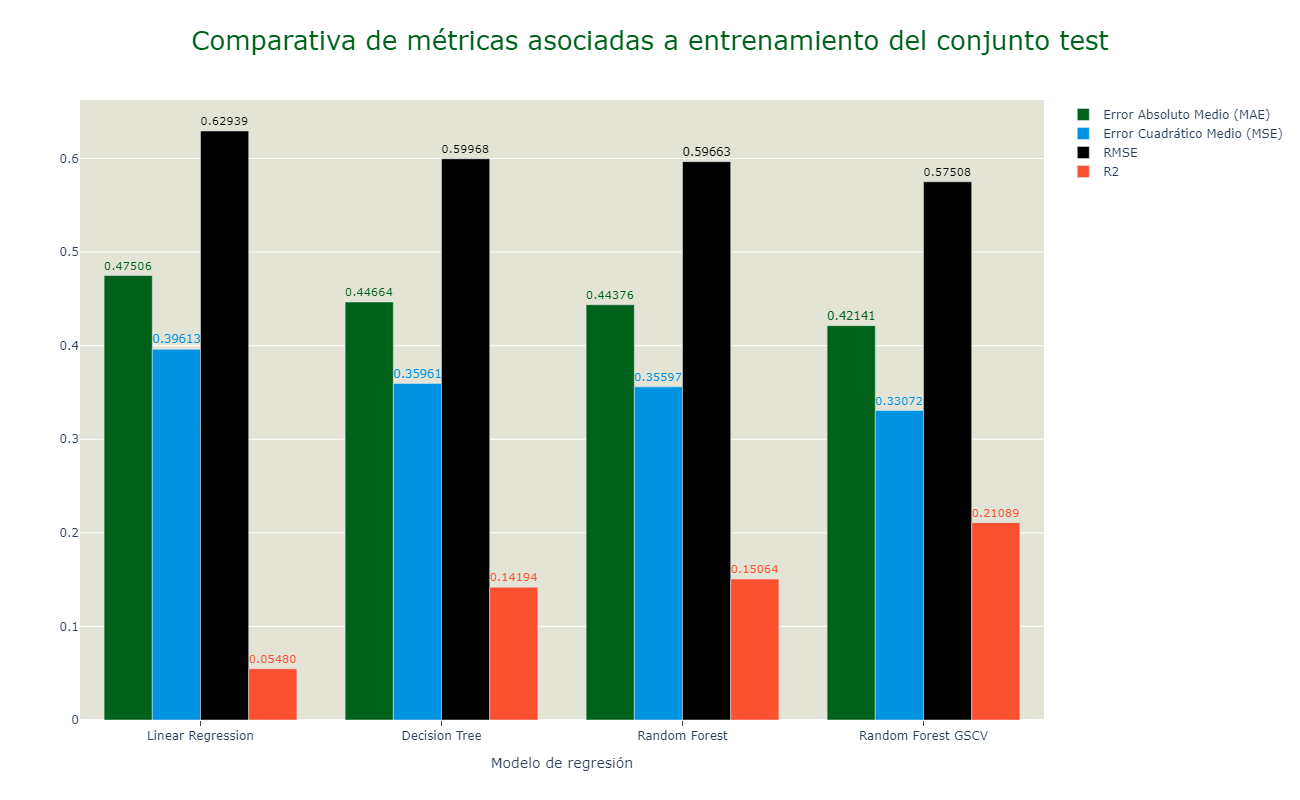

In [99]:
fig_bars = go.Figure()

fig_bars.add_trace(go.Bar(
        x = df_supervized.columns,
        y = df_supervized.iloc[1, :],
        marker = dict(color = '#00621A'),
        texttemplate = [f"{i:,.5f}" for i in df_supervized.iloc[1, :]],
        textfont = dict(color = '#00621A'),
        textposition = 'outside',
        name = 'Error Absoluto Medio (MAE)'
))
fig_bars.add_trace(go.Bar(
        x = df_supervized.columns,
        y = df_supervized.iloc[3, :],
        marker = dict(color = '#0093E2'),
        texttemplate = [f"{i:,.5f}" for i in df_supervized.iloc[3, :]],
        textfont = dict(color = '#0093E2'),
        textposition = 'outside',
        name = 'Error Cuadrático Medio (MSE)'
))
fig_bars.add_trace(go.Bar(
        x = df_supervized.columns,
        y = df_supervized.iloc[5, :],
        marker = dict(color = '#000000'),
        texttemplate = [f"{i:,.5f}" for i in df_supervized.iloc[5, :]],
        textfont = dict(color = '#000000'),
        textposition = 'outside',
        name = 'RMSE'
))
fig_bars.add_trace(go.Bar(
        x = df_supervized.columns,
        y = df_supervized.iloc[7, :],
        marker = dict(color = '#FC5130'),
        textfont = dict(color = '#FC5130'),
        textposition = 'outside',
        texttemplate = [f"{i:,.5f}" for i in df_supervized.iloc[7, :]],
        name = 'R2'
))
fig_bars.update_layout(
        title = dict(text = 'Comparativa de métricas asociadas al conjunto test',
                     x = 0.5, font = dict(size = 26, color = '#00621A')),
        plot_bgcolor = '#E3E3D6',
        xaxis = dict(
                title = 'Modelo de regresión',
                ticks = 'outside'
        ),
        height = 800,
        width = 1300
)
fig_bars.show(renderer = 'png')

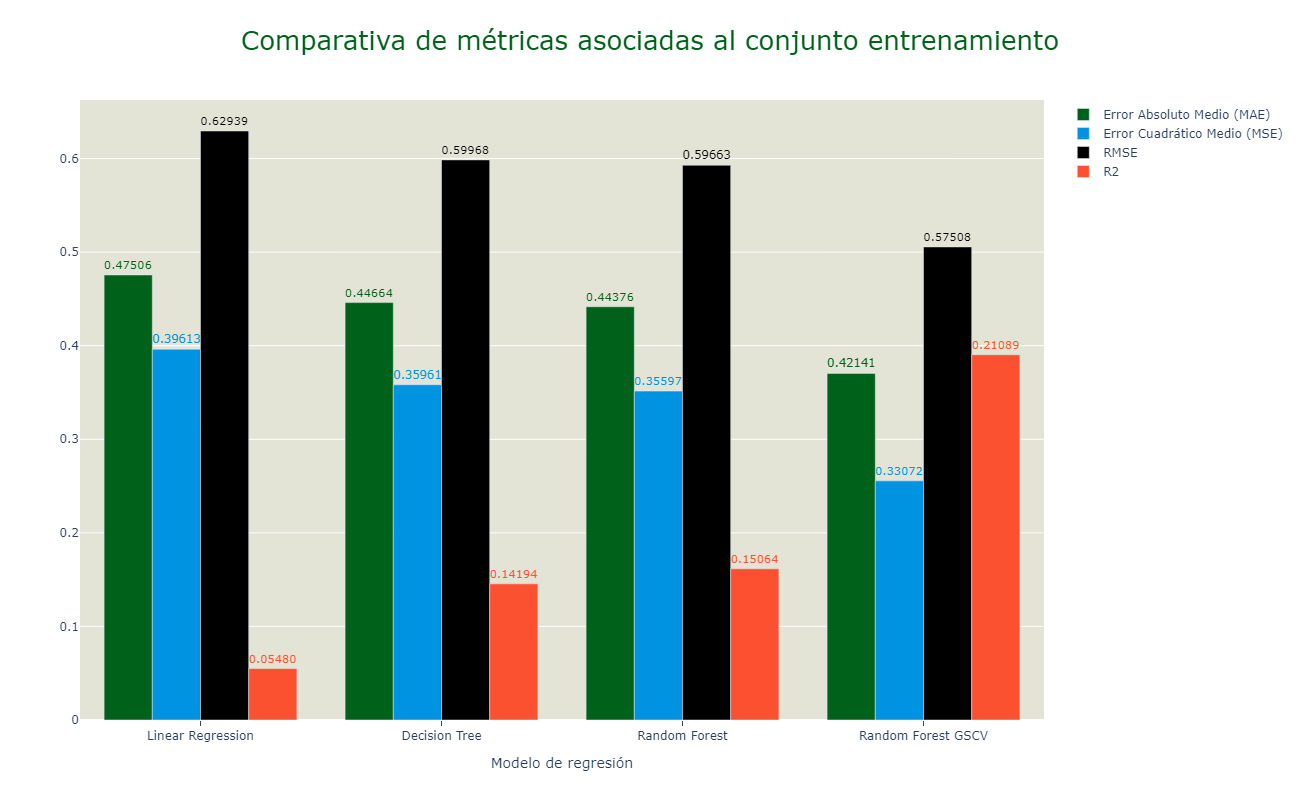

In [100]:
fig_bars = go.Figure()

fig_bars.add_trace(go.Bar(
        x = df_supervized.columns,
        y = df_supervized.iloc[2, :],
        marker = dict(color = '#00621A'),
        texttemplate = [f"{i:,.5f}" for i in df_supervized.iloc[1, :]],
        textfont = dict(color = '#00621A'),
        textposition = 'outside',
        name = 'Error Absoluto Medio (MAE)'
))
fig_bars.add_trace(go.Bar(
        x = df_supervized.columns,
        y = df_supervized.iloc[4, :],
        marker = dict(color = '#0093E2'),
        texttemplate = [f"{i:,.5f}" for i in df_supervized.iloc[3, :]],
        textfont = dict(color = '#0093E2'),
        textposition = 'outside',
        name = 'Error Cuadrático Medio (MSE)'
))
fig_bars.add_trace(go.Bar(
        x = df_supervized.columns,
        y = df_supervized.iloc[6, :],
        marker = dict(color = '#000000'),
        texttemplate = [f"{i:,.5f}" for i in df_supervized.iloc[5, :]],
        textfont = dict(color = '#000000'),
        textposition = 'outside',
        name = 'RMSE'
))
fig_bars.add_trace(go.Bar(
        x = df_supervized.columns,
        y = df_supervized.iloc[8, :],
        marker = dict(color = '#FC5130'),
        textfont = dict(color = '#FC5130'),
        textposition = 'outside',
        texttemplate = [f"{i:,.5f}" for i in df_supervized.iloc[7, :]],
        name = 'R2'
))
fig_bars.update_layout(
        title = dict(text = 'Comparativa de métricas asociadas al conjunto entrenamiento',
                     x = 0.5, font = dict(size = 26, color = '#00621A')),
        plot_bgcolor = '#E3E3D6',
        xaxis = dict(
                title = 'Modelo de regresión',
                ticks = 'outside'
        ),
        height = 800,
        width = 1300
)
fig_bars.show(renderer = 'png')

# 6. MODELO NO SUPERVISADO (CLUSTERING)

## 6.1. CREACIÓN DE CLASES DE RATING COMO LABELS PARA CLUSTERING

In [129]:
data_clustering = datos.copy()
data_clustering

,App Id,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Size,Minimum Android,Released,Last Updated,...,Sports,Tools,Travel & Local,Video Players & Editors,Weather,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
0,com.httrack.android,3.6,2848.0,100000.0,351560.0,1.0,2700.0,2.3,2698.0,1321.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
1,com.skizze.wwii,4.3,17297.0,1000000.0,2161778.0,1.0,86000.0,5.1,896.0,35.0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2,com.themausoft.wpsapp,4.2,488639.0,50000000.0,79304739.0,1.0,5800.0,4.1,1760.0,71.0,...,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0
3,com.mobisystems.office,4.2,1224420.0,100000000.0,163660067.0,1.0,59000.0,4.4,3297.0,38.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
4,com.arthelion.loudplayer,4.2,665.0,50000.0,73463.0,1.0,29000.0,5.0,1559.0,39.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676329,com.varbin.dsr,3.7,6.0,1000.0,2998.0,1.0,6800.0,4.0,1449.0,1366.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676330,com.RandoS.WallJump,5.0,7.0,50.0,62.0,1.0,15000.0,4.4,218.0,206.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676331,com.nivida.user.Boss,4.2,10.0,1000.0,3323.0,1.0,8300.0,4.1,1422.0,808.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676332,com.varbin.shreesensamaj,4.6,36.0,1000.0,4258.0,1.0,12000.0,4.1,1116.0,1114.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0


In [130]:
data_clustering = data_clustering[data_clustering['Released'] >= data_clustering['Last Updated']]
data_clustering

,App Id,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Size,Minimum Android,Released,Last Updated,...,Sports,Tools,Travel & Local,Video Players & Editors,Weather,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
0,com.httrack.android,3.6,2848.0,100000.0,351560.0,1.0,2700.0,2.3,2698.0,1321.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
1,com.skizze.wwii,4.3,17297.0,1000000.0,2161778.0,1.0,86000.0,5.1,896.0,35.0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2,com.themausoft.wpsapp,4.2,488639.0,50000000.0,79304739.0,1.0,5800.0,4.1,1760.0,71.0,...,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0
3,com.mobisystems.office,4.2,1224420.0,100000000.0,163660067.0,1.0,59000.0,4.4,3297.0,38.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
4,com.arthelion.loudplayer,4.2,665.0,50000.0,73463.0,1.0,29000.0,5.0,1559.0,39.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676329,com.varbin.dsr,3.7,6.0,1000.0,2998.0,1.0,6800.0,4.0,1449.0,1366.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676330,com.RandoS.WallJump,5.0,7.0,50.0,62.0,1.0,15000.0,4.4,218.0,206.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676331,com.nivida.user.Boss,4.2,10.0,1000.0,3323.0,1.0,8300.0,4.1,1422.0,808.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
676332,com.varbin.shreesensamaj,4.6,36.0,1000.0,4258.0,1.0,12000.0,4.1,1116.0,1114.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0


In [131]:
clases_rating = []
for rating in data_clustering['Rating']:
    if 1 <= rating < 2:
        clases_rating.append(0)
    elif 2 <= rating < 3:
        clases_rating.append(1)
    elif 3 <= rating < 4:
        clases_rating.append(2)
    elif 4 <= rating <= 5:
        clases_rating.append(3)

clase, frecuencia_clase = np.unique(clases_rating, return_counts = True)

In [132]:
data_clustering['Rating'] = clases_rating

In [133]:
real_labels_frec = pd.DataFrame(columns = ['Clase Rating', 'Frecuencia'], index = ['[1, 2[', '[2, 3[', '[3, 4[', '[4, 5]'])
real_labels_frec['Clase Rating'] = clase
real_labels_frec['Frecuencia'] = frecuencia_clase
real_labels_frec_styled = styler_df(real_labels_frec)
real_labels_frec_styled

,Clase Rating,Frecuencia
"[1, 2[",0,6279
"[2, 3[",1,36378
"[3, 4[",2,184110
"[4, 5]",3,447921


## 6.2. SEPARACIÓN DE X Y LABELS PARA CLUSTERING

In [134]:
x_cluster = data_clustering.drop(columns = ['App Id', 'Rating'])
x_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674688 entries, 0 to 676333
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Rating Count             674688 non-null  float64
 1   Minimum Installs         674688 non-null  float64
 2   Maximum Installs         674688 non-null  float64
 3   Free                     674688 non-null  float64
 4   Size                     674688 non-null  float64
 5   Minimum Android          674688 non-null  float64
 6   Released                 674688 non-null  float64
 7   Last Updated             674688 non-null  float64
 8   Ad Supported             674688 non-null  float64
 9   In App Purchases         674688 non-null  float64
 10  Price USD                674688 non-null  float64
 11  Art & Design             674688 non-null  uint8  
 12  Auto & Vehicles          674688 non-null  uint8  
 13  Beauty                   674688 non-null  uint8  
 14  Book

In [135]:
y_cluster_real_labels = data_clustering['Rating']
y_cluster_real_labels

0         2
1         3
2         3
3         3
4         3
         ..
676329    2
676330    3
676331    3
676332    3
676333    3
Name: Rating, Length: 674688, dtype: int64

## 6.3. FUNCIONES

In [136]:
def get_metrics_clustering(estimators, real_labels):
    metrics = []
    cluster_number = 2
    for estimator in estimators:
        hcvs = homogeneity_completeness_v_measure(real_labels, estimator.labels_)
        dict_metrics = {
            'n_clusters': cluster_number,
            'homogeneity': hcvs[0],
            'completeness': hcvs[1],
            'v_measure': hcvs[2],
            'inertia': estimator.inertia_
        }
        cluster_number += 1
        metrics.append(dict_metrics)
    return metrics

In [137]:
def create_table_metrics_clustering(metrics, name_model):
    cols = [name_model]
    rows = ['Cluster Number', 'Homogeneity', 'Completeness', 'V-Measure', 'Inertia']

    df = pd.DataFrame(columns=cols, index=rows)
    df[name_model] = metrics.values()
    return df

In [138]:
def plot_scatter(estimator_fited, X, name_model, y_real = None):
    df_x = pd.DataFrame(X)

    fig = go.Figure()
    fig.add_scatter(
        x = df_x[0],
        y = df_x[1],
        mode = 'markers',
        name = 'Data PCA Estimator',
        marker = dict(
            sizemode = 'diameter',
            color = estimator_fited.labels_,
            opacity = 0.7 if y_real is None else 0.95,
            colorscale = 'electric'
        ),
        text = [str(i) for i in estimator_fited.labels_],
        visible = 'legendonly' if y_real is not None else True,
    )
    fig.add_scatter(
        x = df_x[0],
        y = df_x[1],
        mode = 'markers',
        name = 'Ground Truth Y',
        marker = dict(
            symbol = 'diamond-x',
            color = y_real,
            opacity = 0.5,
            colorscale = 'electric'
        ),
        text = [str(i) for i in estimator_fited.labels_],
        visible = y_real is not None
    )
    fig.add_scatter(
        x = estimator_fited.cluster_centers_[:, 0],
        y = estimator_fited.cluster_centers_[:, 1],
        mode = 'markers',
        name = 'Cluster Centers',
        marker = dict(
            symbol = 'star-triangle-up',
            size = 10,
            color = '#2CBAA7',
            line = dict(width = 2, color = '#0F685A'),
        ),
        visible = y_real is None
    )
    fig.update_layout(
        width = 800,
        height = 700,
        plot_bgcolor = '#98A39A',
        title = dict(text = f'{name_model}', x = 0.5, font = dict(size = 26, color = '#00621a')),
        legend = dict(x = 0),
        margin = dict(l = 20, r = 10, t = 100, b = 20)
    )
    fig.show(renderer = 'png')

    color_labels, counts = np.unique(estimator_fited.labels_, return_counts = True)

    header_color = '#711616'
    row_even_color = '#FF9595'
    row_odd_color = '#FFD0D0'

    table_labels = go.Figure(go.Table(
        header = dict(
            values = ['<b>LABEL</b>', '<b>COUNT</b>'],
            line_color = 'black',
            fill_color = header_color,
            font = dict(color = 'white', size = 12)
        ),
        cells = dict(
            values = [color_labels, counts],
            line_color = 'black',
            fill_color = [[row_odd_color, row_even_color] * len(counts)],
            font = dict(color = 'black', size = 11)
        )
    ))
    table_labels.update_layout(
        width = 300,
        height = 200,
        margin = dict(l = 5, r = 5, t = 5, b = 5)
    )
    table_labels.show(renderer = 'png')

## 6.4. ESCALADO CON STANDARD SCALER Y REDUCCIÓN DE DIMENSIONALIDAD CON PCA

In [151]:
scaler = StandardScaler()
x_cluster_scaled = scaler.fit_transform(x_cluster)

In [169]:
x_cluster_scaled_pca_2c = PCA(n_components = 2).fit_transform(x_cluster_scaled)
x_cluster_scaled_pca_2c

array([[-2.18747302,  0.9385244 ],
       [ 4.79124183, -1.15818289],
       [ 0.17989555,  3.44039654],
       ...,
       [-1.26953938,  0.34664116],
       [-0.0933235 ,  0.03206941],
       [ 2.99697292, -0.85486697]])

## 6.5. ENTRENAMIENTO CON MINIBATCH KMEANS

In [170]:
MBKMEANS_estimators = []
for number_cluster in range(2, 10 + 1):
    MB_Kmeans = MiniBatchKMeans(n_clusters = number_cluster)
    MB_Kmeans.fit(x_cluster_scaled_pca_2c)
    MBKMEANS_estimators.append(MB_Kmeans)
MBKMEANS_estimators

[MiniBatchKMeans(n_clusters=2),
 MiniBatchKMeans(n_clusters=3),
 MiniBatchKMeans(n_clusters=4),
 MiniBatchKMeans(n_clusters=5),
 MiniBatchKMeans(n_clusters=6),
 MiniBatchKMeans(n_clusters=7),
 MiniBatchKMeans(),
 MiniBatchKMeans(n_clusters=9),
 MiniBatchKMeans(n_clusters=10)]

In [171]:
MBKMEANS_metrics = get_metrics_clustering(MBKMEANS_estimators, y_cluster_real_labels)

In [172]:
metrics_dfs = []
for metric in MBKMEANS_metrics:
    df_metric = create_table_metrics_clustering(metric, f'MiniBatch Kmeans c={metric["n_clusters"]}')
    metrics_dfs.append(df_metric)

In [173]:
df_global_est_cluster_metrics = pd.concat(metrics_dfs, axis = 1)
df_global_est_cluster_metrics_styled = styler_df(df_global_est_cluster_metrics)
df_global_est_cluster_metrics_styled

,MiniBatch Kmeans c=2,MiniBatch Kmeans c=3,MiniBatch Kmeans c=4,MiniBatch Kmeans c=5,MiniBatch Kmeans c=6,MiniBatch Kmeans c=7,MiniBatch Kmeans c=8,MiniBatch Kmeans c=9,MiniBatch Kmeans c=10
Cluster Number,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
Homogeneity,0.001086,0.001485,0.002421,0.002285,0.002570,0.002823,0.003054,0.002878,0.002875
Completeness,0.001836,0.001228,0.001770,0.001311,0.001352,0.001376,0.001399,0.001161,0.001126
V-Measure,0.001365,0.001344,0.002045,0.001666,0.001772,0.001851,0.001919,0.001654,0.001618
Inertia,2171684.380914,1908322.521037,1797668.910916,1716315.750964,1684279.308965,1669373.014262,1608710.348020,1632886.850939,1624967.702128


## 6.6. GRÁFICO DE INERCIA

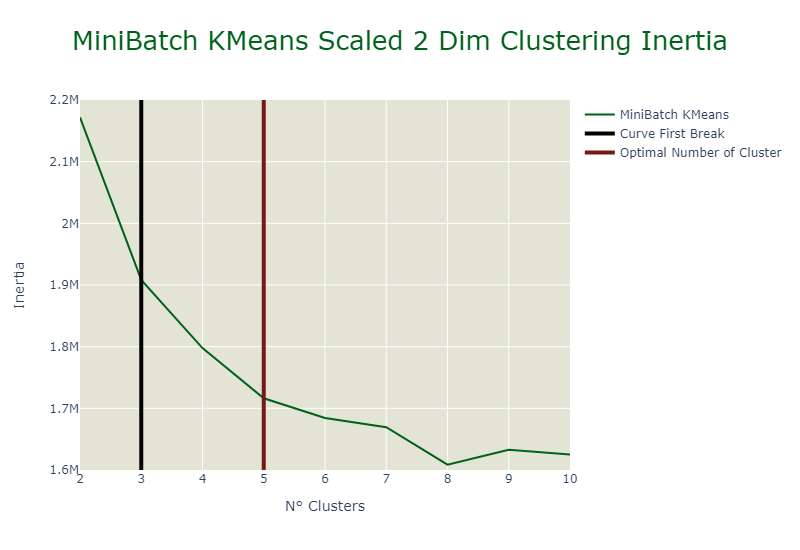

In [179]:
plot_inertia = go.Figure()

plot_inertia.add_trace(go.Scatter(
    x = df_global_est_cluster_metrics.iloc[0, :],
    y = df_global_est_cluster_metrics.iloc[-1, :],
    mode = 'lines',
    marker = dict(color = '#00621a'),
    name = 'MiniBatch KMeans'
))
plot_inertia.add_trace(go.Scatter(
    x = [3] * 100,
    y = np.linspace(1600000, 2200000, 100),
    mode = 'lines',
    name = 'Curve First Break',
    marker = dict(color = '#000000'),
    line = dict(width = 4)
))
plot_inertia.add_trace(go.Scatter(
    x = [5] * 100,
    y = np.linspace(1600000, 2200000, 100),
    mode = 'lines',
    name = 'Optimal Number of Cluster',
    marker = dict(color = '#761A16'),
    line = dict(width = 4)
))
plot_inertia.update_layout(
    title = dict(text = 'MiniBatch KMeans Scaled 2 Dim Clustering Inertia', x = 0.5, font = dict(size = 26, color = '#00621a')),
    plot_bgcolor = '#E3E3D6',
    width = 800,
    height = 550,
    xaxis = dict(title = 'N° Clusters', tick0 = 2, dtick = 1),
    yaxis_title = 'Inertia',
    yaxis_range = [1600000, 2200000]
)
plot_inertia.show(renderer = 'png')

## 6.7. GRÁFICOS DE CLUSTERING

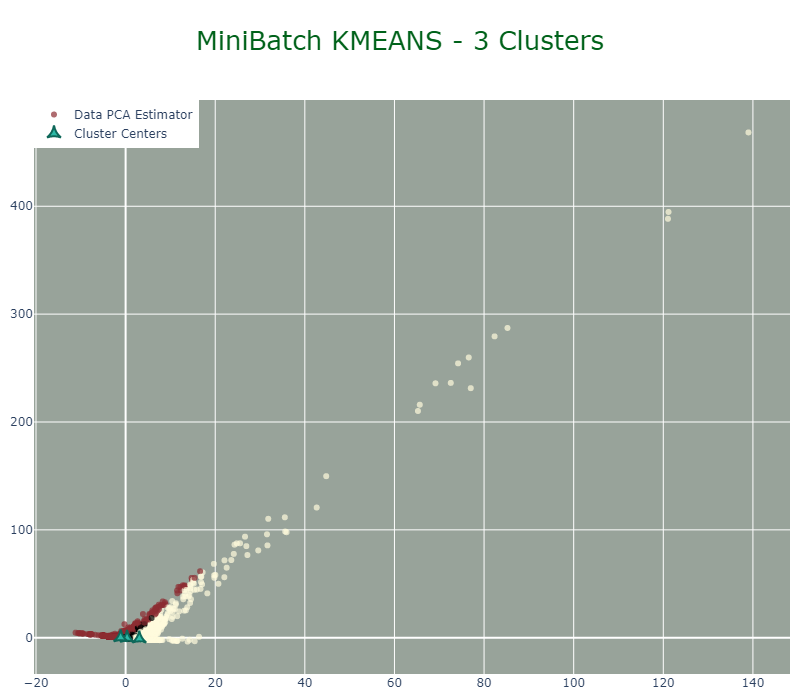

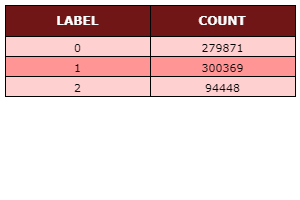

In [180]:
plot_scatter(MBKMEANS_estimators[1], x_cluster_scaled_pca_2c, 'MiniBatch KMEANS - 3 Clusters')

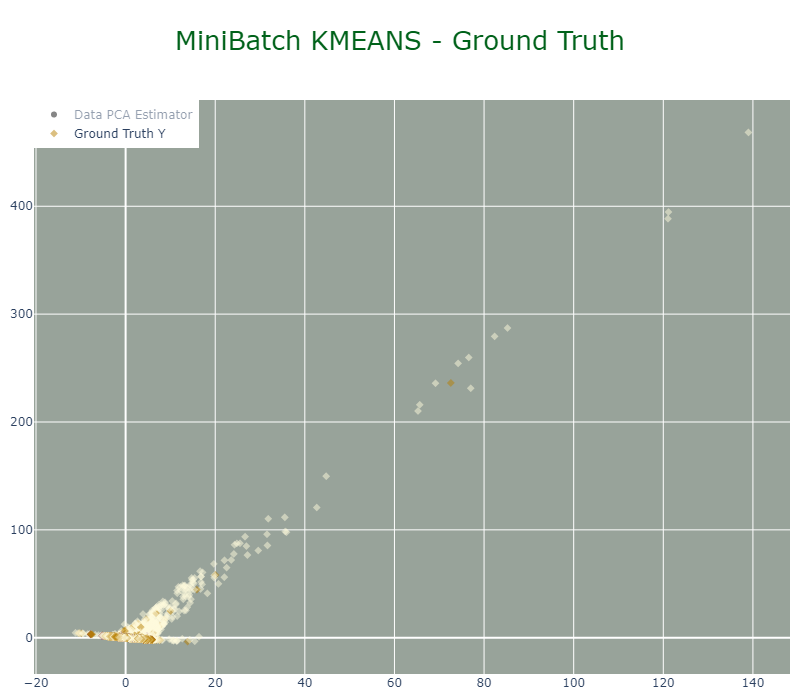

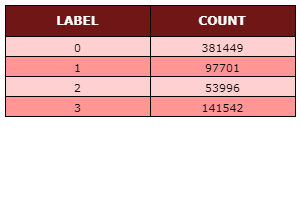

In [181]:
plot_scatter(MBKMEANS_estimators[2], x_cluster_scaled_pca_2c, 'MiniBatch KMEANS - Ground Truth', y_real = y_cluster_real_labels)

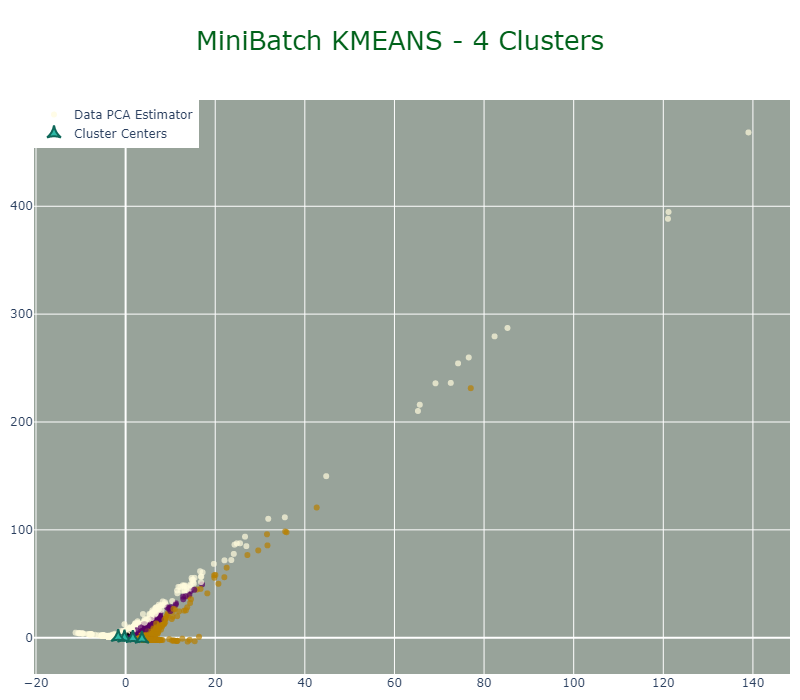

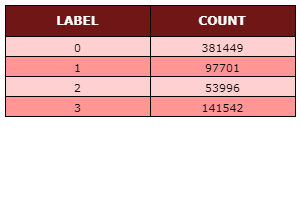

In [177]:
plot_scatter(MBKMEANS_estimators[2], x_cluster_scaled_pca_2c, 'MiniBatch KMEANS - 4 Clusters')

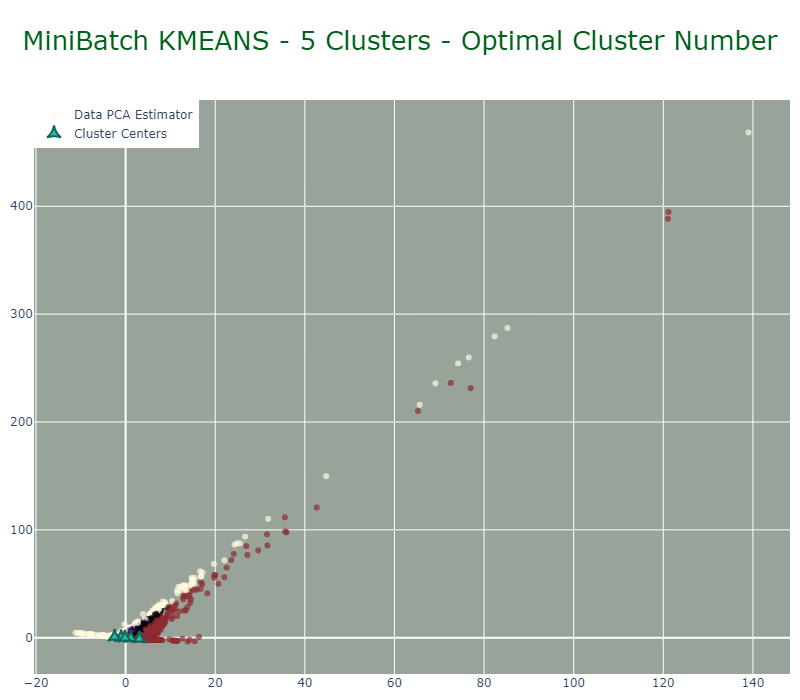

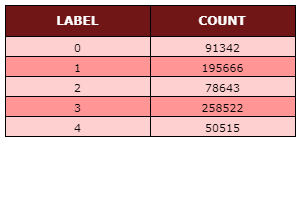

In [178]:
plot_scatter(MBKMEANS_estimators[3], x_cluster_scaled_pca_2c, 'MiniBatch KMEANS - 5 Clusters - Optimal Cluster Number')